### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

### Loading the Data
#### Import Data

In [3]:
# Import Train and Test Data.
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

In [2]:
loan_data_backup = pd.read_csv('9.4 loan_data_2015.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Explore Data

In [5]:
loan_data = loan_data_backup.copy()

In [6]:
pd.options.display.max_columns = None

In [7]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,Foreign Service Officer,10+ years,MORTGAGE,128000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,200xx,DC,6.46,0.0,Feb-90,0.0,46.0,NaN,17.0,0.0,14277,27.4,46.0,w,35000.0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,56.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,321.0,146867.0,1.0,11.0,0.0,0.0,28.0,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,Associate Consultant,< 1 year,MORTGAGE,100000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,462xx,IN,7.28,0.0,Jul-01,0.0,NaN,NaN,15.0,0.0,7158,26.7,24.0,w,8650.0,8650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,165450.0,0.0,1.0,1.0,1.0,11.0,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,mechanic,5 years,RENT,35000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,672xx,KS,15.22,2.0,Jul-11,0.0,18.0,NaN,6.0,0.0,1058,24.6,6.0,w,4225.0,4225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4888.0,0.0,1.0,0.0,0.0,47.0,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,CARDIOVASCULAR TECH,10+ years,RENT,42500.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,460xx,IN,31.04,0.0,Dec-98,1.0,NaN,NaN,10.0,0.0,5812,40.9,23.0,w,10000.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,41166.0,1.0,3.0,0.0,2.0,13.0,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-00,0.0,NaN,NaN,6.0,0.0,7869,56.2,18.0,w,20000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Dec-15,0.0,NaN,1,JOINT,71000.0,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0


In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  float64
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

>>> The code from here to the other line starting with '>>>' is copied from the Data Preparation notebook, with minor adjustments. We have to perform the exact same data preprocessing, fine-classing, and coarse classing on the new data, in order to be able to calculate statistics for the exact same variables to the ones we used for training and testing the PD model.

## General Processing

### Preprocessing few continuous variables
#### some are object (text type) rather than int or float

In [9]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '5 years', '3 years', '4 years', nan,
       '2 years', '8 years', '9 years', '1 year', '6 years', '7 years'],
      dtype=object)

In [10]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [11]:
type(loan_data['emp_length_int'][0])
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
type(loan_data['emp_length_int'][0])

numpy.float64

In [12]:
loan_data['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [13]:
loan_data['emp_length_int'].unique()

array([10.,  0.,  5.,  3.,  4., nan,  2.,  8.,  9.,  1.,  6.,  7.])

In [14]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
loan_data['term_int'] = loan_data['term_int'].str.replace(' ', '')
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])
loan_data['term_int'].unique()

array([60, 36])

In [15]:
loan_data['earliest_cr_line']

0         Feb-90
1         Jul-01
2         Jul-11
3         Dec-98
4         Aug-00
           ...  
421089    Sep-04
421090    Mar-74
421091    Sep-03
421092    Oct-03
421093    Dec-01
Name: earliest_cr_line, Length: 421094, dtype: object

In [16]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [17]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
loan_data['months_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [19]:
loan_data['months_since_earliest_cr_line'].describe()

count    421094.000000
mean        227.354876
std          98.123989
min        -612.000000
25%         167.000000
50%         212.000000
75%         277.000000
max         587.000000
Name: months_since_earliest_cr_line, dtype: float64

In [20]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'months_since_earliest_cr_line']][loan_data['months_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,months_since_earliest_cr_line
254,Jan-57,2057-01-01,-469.0
618,Aug-64,2064-08-01,-560.0
648,Jul-68,2068-07-01,-607.0
1808,Jan-65,2065-01-01,-565.0
2583,Sep-64,2064-09-01,-561.0
...,...,...,...
418890,Jun-68,2068-06-01,-606.0
420450,Jan-66,2066-01-01,-577.0
420642,Sep-68,2068-09-01,-609.0
420794,Sep-65,2065-09-01,-573.0


In [21]:
loan_data['months_since_earliest_cr_line'][loan_data['months_since_earliest_cr_line'] < 0] = loan_data['months_since_earliest_cr_line'].max()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
min(loan_data['months_since_earliest_cr_line'])

61.0

In [23]:
loan_data['issue_d']

0         Dec-15
1         Dec-15
2         Dec-15
3         Dec-15
4         Dec-15
           ...  
421089    Jan-15
421090    Jan-15
421091    Jan-15
421092    Jan-15
421093    Jan-15
Name: issue_d, Length: 421094, dtype: object

In [24]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')

In [25]:
type(loan_data['issue_d_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
loan_data['months_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2012-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))

In [27]:
loan_data['months_since_issue_d'].describe()

count    421094.000000
mean        -30.955371
std           3.458162
min         -36.000000
25%         -34.000000
50%         -31.000000
75%         -28.000000
max         -25.000000
Name: months_since_issue_d, dtype: float64

In [28]:
loan_data.loc[:, ['issue_d', 'issue_d_date', 'months_since_issue_d']][loan_data['months_since_issue_d'] < 0]

,issue_d,issue_d_date,months_since_issue_d
0,Dec-15,2015-12-01,-36.0
1,Dec-15,2015-12-01,-36.0
2,Dec-15,2015-12-01,-36.0
3,Dec-15,2015-12-01,-36.0
4,Dec-15,2015-12-01,-36.0
...,...,...,...
421089,Jan-15,2015-01-01,-25.0
421090,Jan-15,2015-01-01,-25.0
421091,Jan-15,2015-01-01,-25.0
421092,Jan-15,2015-01-01,-25.0


In [29]:
loan_data['months_since_issue_d'][loan_data['months_since_issue_d'] < 0] = loan_data['months_since_issue_d'].max()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
min(loan_data['months_since_issue_d'])

-25.0

### Preprocessing few discrete variables

In [31]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 80 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   id                             421094 non-null  int64         
 1   member_id                      421094 non-null  int64         
 2   loan_amnt                      421094 non-null  int64         
 3   funded_amnt                    421094 non-null  int64         
 4   funded_amnt_inv                421094 non-null  float64       
 5   term                           421094 non-null  object        
 6   int_rate                       421094 non-null  float64       
 7   installment                    421094 non-null  float64       
 8   grade                          421094 non-null  object        
 9   sub_grade                      421094 non-null  object        
 10  emp_title                      397220 non-null  object        
 11  

In [32]:
pd.get_dummies(loan_data['grade'])

,A,B,C,D,E,F,G
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
421089,0,1,0,0,0,0,0
421090,0,1,0,0,0,0,0
421091,0,0,0,1,0,0,0
421092,0,0,0,0,1,0,0


In [33]:
pd.get_dummies(loan_data['grade'], prefix="grade", prefix_sep=":")

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
421089,0,1,0,0,0,0,0
421090,0,1,0,0,0,0,0
421091,0,0,0,1,0,0,0
421092,0,0,0,0,1,0,0


In [34]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix="grade", prefix_sep=":"),
                    pd.get_dummies(loan_data['sub_grade'], prefix="sub_grade", prefix_sep=":"),
                    pd.get_dummies(loan_data['home_ownership'], prefix="home_ownership", prefix_sep=":"),
                    pd.get_dummies(loan_data['verification_status'], prefix="verification_status", prefix_sep=":"),
                    pd.get_dummies(loan_data['loan_status'], prefix="loan_status", prefix_sep=":"),
                    pd.get_dummies(loan_data['purpose'], prefix="purpose", prefix_sep=":"),
                    pd.get_dummies(loan_data['addr_state'], prefix="addr_state", prefix_sep=":"),
                    pd.get_dummies(loan_data['initial_list_status'], prefix="initial_list_status", prefix_sep=":")]

In [35]:
loan_data_dummies = pd.concat(loan_data_dummies, axis=1)

In [36]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [37]:
loan_data_dummies

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421089,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
421090,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [38]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [39]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [40]:
loan_data.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,months_since_earliest_cr_line,issue_d_date,months_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [41]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

id                                          0
member_id                                   0
loan_amnt                                   0
funded_amnt                                 0
funded_amnt_inv                             0
term                                        0
int_rate                                    0
installment                                 0
grade                                       0
sub_grade                                   0
emp_title                               23874
emp_length                              23817
home_ownership                              0
annual_inc                                  0
verification_status                         0
issue_d                                     0
loan_status                                 0
pymnt_plan                                  0
url                                         0
desc                                   421049
purpose                                     0
title                             

In [42]:
pd.options.display.max_rows = 100

In [43]:
loan_data['total_rev_hi_lim'].mean()

33657.50515561846

In [44]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [45]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [46]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace = True)

In [47]:
loan_data['months_since_earliest_cr_line'].fillna(0, inplace = True)
loan_data['acc_now_delinq'].fillna(0, inplace = True)
loan_data['total_acc'].fillna(0, inplace = True)
loan_data['pub_rec'].fillna(0, inplace = True)
loan_data['open_acc'].fillna(0, inplace = True)
loan_data['inq_last_6mths'].fillna(0, inplace = True)
loan_data['delinq_2yrs'].fillna(0, inplace = True)
loan_data['emp_length_int'].fillna(0, inplace = True)

## **Data Preparation**

### **Depedent Variable. Good/Bad (Default) Definition. Default and Non-defailt Accounts**

In [48]:
loan_data['loan_status'].unique()

array(['Issued', 'Current', 'Fully Paid', 'In Grace Period',
       'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off',
       'Default'], dtype=object)

In [49]:
loan_data['loan_status'].value_counts()

Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: loan_status, dtype: int64

In [50]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current               0.896600
Fully Paid            0.054582
Issued                0.020091
Late (31-120 days)    0.011140
In Grace Period       0.007378
Charged Off           0.006585
Late (16-30 days)     0.002705
Default               0.000919
Name: loan_status, dtype: float64

In [51]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default', 
                                                                'Does not meet the credit policy. Status:Charged Off', 
                                                                'Late (31-120 days)']), 0, 1)

In [52]:
loan_data['good_bad']

0         1
1         1
2         1
3         1
4         1
         ..
421089    1
421090    1
421091    1
421092    1
421093    1
Name: good_bad, Length: 421094, dtype: int64

In [53]:
loan_data['loan_status']

0          Issued
1          Issued
2          Issued
3          Issued
4          Issued
           ...   
421089    Current
421090    Current
421091    Current
421092    Current
421093    Current
Name: loan_status, Length: 421094, dtype: object

### Splitting Data

In [54]:
#from sklearn.model_selection import train_test_split

In [55]:
#train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'])

In [56]:
#loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'])

In [57]:
#print(loan_data_inputs_train.shape)
#print(loan_data_targets_train.shape)
#print(loan_data_inputs_test.shape)
#print(loan_data_targets_test.shape)

In [58]:
#loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'], test_size=0.2, random_state=42)

In [59]:
#print(loan_data_inputs_train.shape)
#print(loan_data_targets_train.shape)
#print(loan_data_inputs_test.shape)
#print(loan_data_targets_test.shape)

### Data Preparation: An Example

In [60]:
df_inputs_prepr = loan_data.drop('good_bad', axis = 1)
df_targets_prepr = loan_data['good_bad']
#df_inputs_prepr = loan_data_inputs_test
#df_targets_prepr = loan_data_targets_test

In [61]:
# assess explanatory power w.r.t the outcome of interest, i.e., good or bad borrower (need corresponding outcomes 
#  in the good/bad column)
df_inputs_prepr['grade'].unique()

array(['C', 'A', 'B', 'F', 'D', 'E', 'G'], dtype=object)

In [62]:
df_inputs_prepr

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,months_since_earliest_cr_line,issue_d_date,months_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,Foreign Service Officer,10+ years,MORTGAGE,128000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,200xx,DC,6.46,0.0,Feb-90,0.0,46.0,NaN,17.0,0.0,14277,27.4,46.0,w,35000.00,35000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,Jan-16,Jan-16,0.0,56.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,321.0,146867.0,1.0,11.0,0.0,0.0,28.0,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0,10.0,60,1990-02-01,334.0,2015-12-01,-25.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,Associate Consultant,< 1 year,MORTGAGE,100000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,462xx,IN,7.28,0.0,Jul-01,0.0,NaN,

In [63]:
# new dataframe with only independent var grade and dependent var good/bad
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head

<bound method NDFrame.head of        grade  good_bad
0          C         1
1          A         1
2          C         1
3          C         1
4          B         1
...      ...       ...
421089     B         1
421090     B         1
421091     D         1
421092     E         1
421093     B         1

[421094 rows x 2 columns]>

In [64]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,73335
1,B,117606
2,C,120567
3,D,62654
4,E,34948
5,F,9817
6,G,2167


In [65]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.996359
1,B,0.991097
2,C,0.982541
3,D,0.967488
4,E,0.956936
5,F,0.930529
6,G,0.904015


In [66]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)

In [67]:
df1.head

<bound method NDFrame.head of   grade  good_bad grade  good_bad
0     A     73335     A  0.996359
1     B    117606     B  0.991097
2     C    120567     C  0.982541
3     D     62654     D  0.967488
4     E     34948     E  0.956936
5     F      9817     F  0.930529
6     G      2167     G  0.904015>

In [68]:
df1 = df1.iloc[: , [0, 1, 3]]
df1

,grade,good_bad,good_bad
0,A,73335,0.996359
1,B,117606,0.991097
2,C,120567,0.982541
3,D,62654,0.967488
4,E,34948,0.956936
5,F,9817,0.930529
6,G,2167,0.904015


In [69]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,73335,0.996359
1,B,117606,0.991097
2,C,120567,0.982541
3,D,62654,0.967488
4,E,34948,0.956936
5,F,9817,0.930529
6,G,2167,0.904015


In [70]:
# Weight of evidence calculations

# Proportion of observations that falls under each grade
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [71]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,73335,0.996359,0.174154
1,B,117606,0.991097,0.279287
2,C,120567,0.982541,0.286318
3,D,62654,0.967488,0.148789
4,E,34948,0.956936,0.082993
5,F,9817,0.930529,0.023313
6,G,2167,0.904015,0.005146


In [72]:
# num of good and bad borrowers by grade
df1['num_good'] = df1['prop_good'] * df1['n_obs']
df1['num_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,num_good,num_bad
0,A,73335,0.996359,0.174154,73068.0,267.0
1,B,117606,0.991097,0.279287,116559.0,1047.0
2,C,120567,0.982541,0.286318,118462.0,2105.0
3,D,62654,0.967488,0.148789,60617.0,2037.0
4,E,34948,0.956936,0.082993,33443.0,1505.0
5,F,9817,0.930529,0.023313,9135.0,682.0
6,G,2167,0.904015,0.005146,1959.0,208.0


In [73]:
# proportion of good and bad borrowers for each grade
df1['prop_n_good'] = df1['num_good'] / df1['num_good'].sum()
df1['prop_n_bad'] = df1['num_bad'] / df1['num_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad
0,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.034008
1,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.133359
2,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.268119
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.259457
4,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.191695
5,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.086868
6,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.026493


In [74]:
# Weight of Evidence is the natural log of the ratio of the proportion of good borrowers to the proportion of 
#  bad borrowers.

df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE
0,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.034008,1.648502
1,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.133359,0.749074
2,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.268119,0.066882
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.259457,-0.570298
4,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.191695,-0.862345
5,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.086868,-1.368556
6,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.026493,-1.720744


In [75]:
df1 = df1.sort_values(['WoE'])

In [76]:
df1

,grade,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE
6,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.026493,-1.720744
5,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.086868,-1.368556
4,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.191695,-0.862345
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.259457,-0.570298
2,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.268119,0.066882
1,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.133359,0.749074
0,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.034008,1.648502


In [77]:
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE
0,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.026493,-1.720744
1,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.086868,-1.368556
2,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.191695,-0.862345
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.259457,-0.570298
4,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.268119,0.066882
5,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.133359,0.749074
6,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.034008,1.648502


In [78]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.026493,-1.720744,NaN,NaN
1,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.086868,-1.368556,0.026514,0.352187
2,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.191695,-0.862345,0.026407,0.506211
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.259457,-0.570298,0.010552,0.292048
4,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.268119,0.066882,0.015053,0.637180
5,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.133359,0.749074,0.008557,0.682192
6,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.034008,1.648502,0.005262,0.899428


In [79]:
# Information Value

df1['IV'] = ((df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']).sum()
df1

,grade,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.026493,-1.720744,NaN,NaN,0.633941
1,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.086868,-1.368556,0.026514,0.352187,0.633941
2,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.191695,-0.862345,0.026407,0.506211,0.633941
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.259457,-0.570298,0.010552,0.292048,0.633941
4,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.268119,0.066882,0.015053,0.637180,0.633941
5,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.133359,0.749074,0.008557,0.682192,0.633941
6,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.034008,1.648502,0.005262,0.899428,0.633941


### Preprocessing Discrete Variables: Automating Calculations

In [80]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], df_targets_prepr], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['num_good'] = df['prop_good'] * df['n_obs']
    df['num_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['num_good'] / df['num_good'].sum()
    df['prop_n_bad'] = df['num_bad'] / df['num_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = ((df['prop_n_good'] - df['prop_n_bad']) * df['WoE']).sum()
    return df

In [81]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.026493,-1.720744,NaN,NaN,0.633941
1,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.086868,-1.368556,0.026514,0.352187,0.633941
2,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.191695,-0.862345,0.026407,0.506211,0.633941
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.259457,-0.570298,0.010552,0.292048,0.633941
4,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.268119,0.066882,0.015053,0.637180,0.633941
5,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.133359,0.749074,0.008557,0.682192,0.633941
6,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.034008,1.648502,0.005262,0.899428,0.633941


### Preprocessing Discrete Variables: Visualizing Results

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [83]:
# directly write a function that visualizes the data with categories of independent variable on the x axis and 
#  the WoE on the y axis.

def plot_by_woe(df_WoE, rotation_x_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = "o", linestyle = "--", color = "k")
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel("WoE")
    plt.title("Weight of Evidence by " + df_WoE.columns[0])
    plt.xticks(rotation = rotation_x_labels)

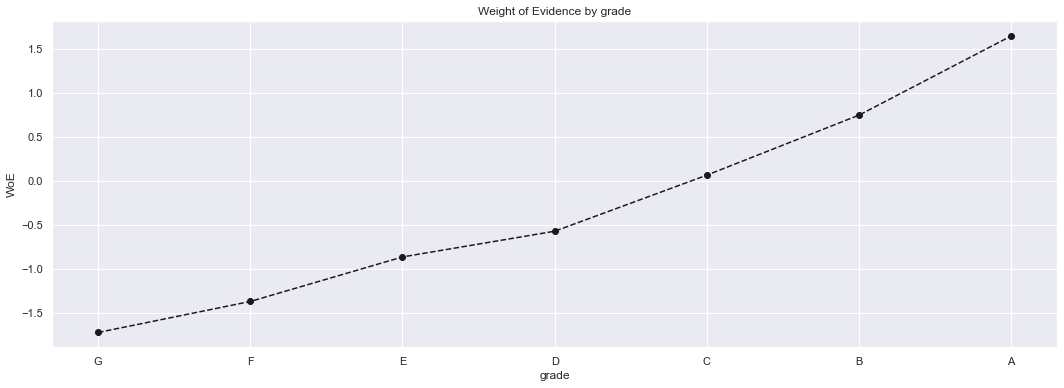

In [84]:
# plot by grade
plot_by_woe(df_temp)

### Preprocessing Discrete Variables: Creating Dummy Variables P1

In [85]:
# Home ownership variable

df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,RENT,167644,0.976933,0.398115,163777.0,3867.0,0.396321,0.492549,-0.217368,NaN,NaN,inf
1,OWN,45766,0.980750,0.108684,44885.0,881.0,0.108616,0.112215,-0.032594,0.003817,0.184775,inf
2,MORTGAGE,207682,0.985059,0.493196,204579.0,3103.0,0.495057,0.395236,0.225190,0.004309,0.257784,inf
3,ANY,2,1.000000,0.000005,2.0,0.0,0.000005,0.000000,inf,0.014941,inf,inf


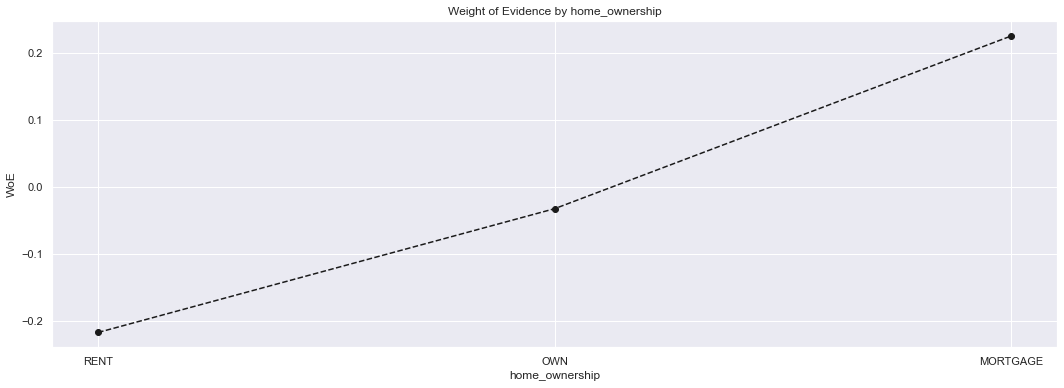

In [86]:
plot_by_woe(df_temp)
# other and none have the highest pd but the number of observations for those categories are significantly less. 
#  The proportion of observations is < 0.0004. and the category any has only 1 observation. Hence, these 
#  underrepresented categories should be combined.

In [89]:
# Combining other, none, and any with the riskiest (credit) category with enough number of observations. 
#  own has a considerably higher weight of evidance than rent so different dummy variables. mortgage category 
#  encompasses half of all borrowers hence different dummy variable.
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                            df_inputs_prepr['home_ownership:ANY']])

In [90]:
loan_data['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

### Preprocessing Discrete Variables: Creating Dummy Variables P2

In [91]:
df_inputs_prepr['addr_state'].unique()
# missing state ND - North Dakota - no data values (added later for future)

array(['DC', 'IN', 'KS', 'IL', 'OR', 'VA', 'PA', 'GA', 'TN', 'OH', 'NY',
       'FL', 'NJ', 'RI', 'NC', 'AL', 'TX', 'SC', 'MD', 'WA', 'MO', 'MN',
       'NH', 'VT', 'AZ', 'MI', 'MA', 'CA', 'LA', 'DE', 'NM', 'CO', 'WI',
       'SD', 'CT', 'NE', 'HI', 'AR', 'MT', 'WV', 'WY', 'OK', 'NV', 'KY',
       'MS', 'ME', 'UT', 'ND', 'AK'], dtype=object)

In [92]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NV,5924,0.969953,0.014068,5746.0,178.0,0.013905,0.022672,-0.488919,NaN,NaN,inf
1,SD,835,0.970060,0.001983,810.0,25.0,0.001960,0.003184,-0.485236,0.000107,0.003683,inf
2,HI,2083,0.973596,0.004947,2028.0,55.0,0.004908,0.007005,-0.355923,0.003536,0.129314,inf
3,OK,3968,0.976310,0.009423,3874.0,94.0,0.009375,0.011973,-0.244647,0.002715,0.111276,inf
4,AK,954,0.977987,0.002266,933.0,21.0,0.002258,0.002675,-0.169512,0.001677,0.075135,inf
5,NY,33844,0.978253,0.080372,33108.0,736.0,0.080118,0.093746,-0.157095,0.000266,0.012417,inf
6,AL,5347,0.978306,0.012698,5231.0,116.0,0.012658,0.014775,-0.154627,0.000052,0.002467,inf
7,UT,2836,0.978491,0.006735,2775.0,61.0,0.006715,0.007770,-0.145863,0.000185,0.008765,inf
8,WY,900,0.978889,0.002137,881.0,19.0,0.002132,0.002420,-0.126776,0.000398,0.019086,inf
9,FL,29298,0.979111,0.069576,28686.0,612.0,0.069417,0.077952,-0.115963,0.000222,0.010814,inf


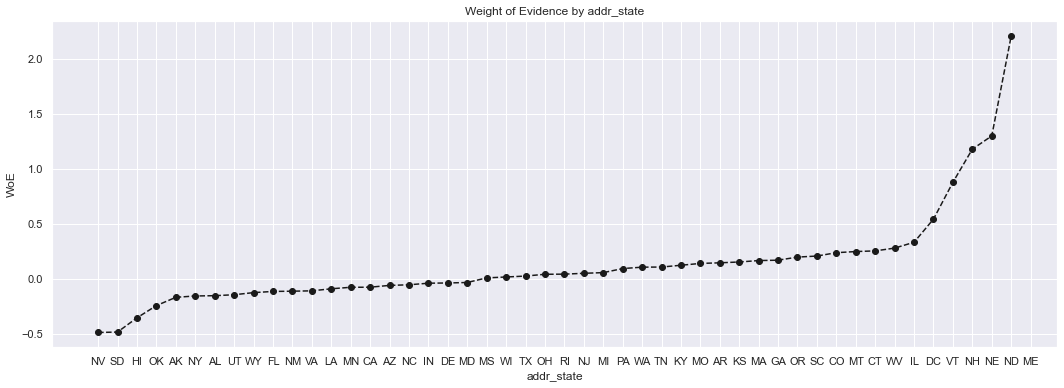

In [93]:
plot_by_woe(df_temp)

In [94]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

In [97]:
if ['addr_state:ID'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ID'] = 0

In [98]:
if ['addr_state:IA'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:IA'] = 0

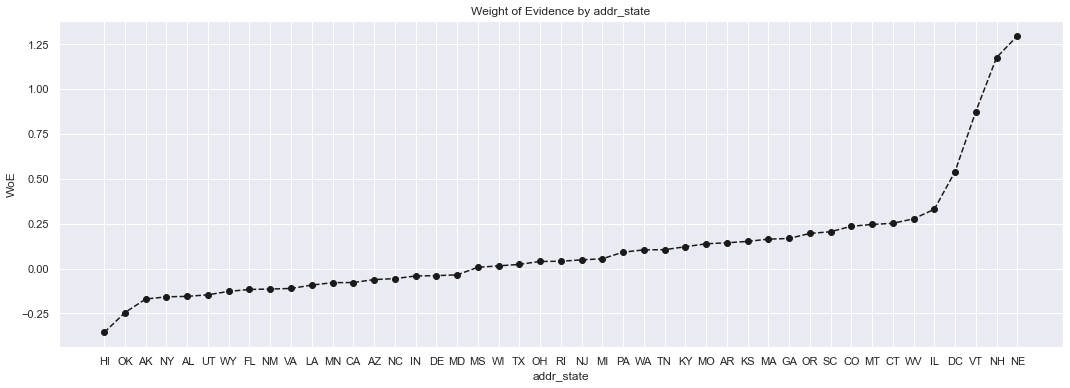

In [99]:
# NE and IA have low observations which is highly likely to have translated into a low weight of evidence. ME and ID
#  have no bad borrowers rsulting in a very high weight of evidence.

# looking at other 46 states
plot_by_woe(df_temp.iloc[2 : -2, :])

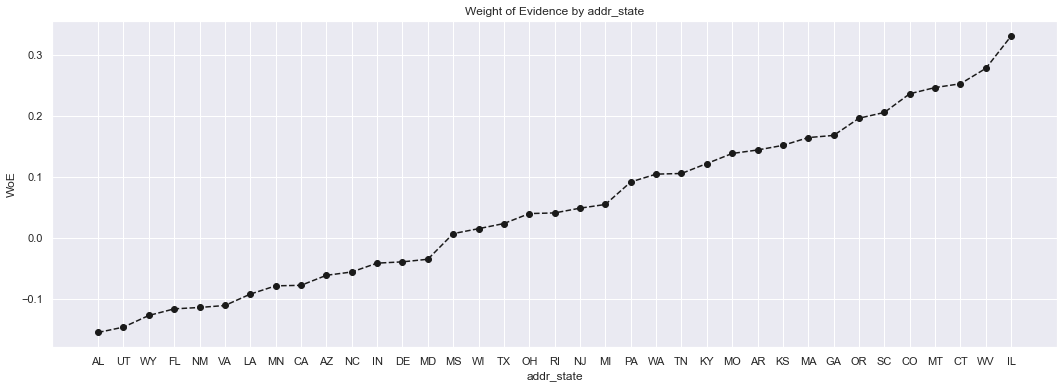

In [100]:
# makes sense to keep nv in one category and the next three in another. but nv has a very low no of observations
#  so we combine nv with ne, ia and fl bcoz fl has a no of obs for both keeping it separate and putting it with other states.
# since this category includes the states with borrowers with the highest credit risk, it makes sense to nd here 
#  because we have no information on it and it reflects a conservative risk management attitude. (By default, as 
#  risk managers, when there is no information the worst or the highest risk should be assumed.)
# hence with this note, first category includes first six states

# the last four states in the chart above can be grouped together due to theire rather low no. of observations.
# so total six with ME and ID

# plotting the remaining 38 states
plot_by_woe(df_temp.iloc[6 : -6, :])

In [101]:
# all states from nm to ca have a similar woe but we also need to take in the number of borrowers. ny and ca have a
#  high number of borrowers and ca seems to have more borrowers than any other state => ca and ny has to be a  
#  different category.
# thus dividing the ten states by ny and ca we get -- nm and va; ny; ok, tn, mo, la, md, nc; ca -- we get four 
#  separate groups.
# it would not have been correct to combine nm and va with ok to nc, because they are separated by ny on the graph.
#  the reason is not the graph itself but the fact that nearly 10% of the observations come from ny thus breaking 
#  the link between va and ok.

# all states from ut to nj have similar woe and none of them stand out with a particularly high or low no. of 
#  borrowers => one separate category
# same with ar to mn
# and same with ri to in
# and same with ga to or
# wi and mt are a bit apart in woe but have a low number of observations so they form a separate group
# tx il and ct have similar woe but tx has a high no. of observations. so tx is separate and il and ct are together
# woe of the six states after ct -- ks sc co vt ak ms -- is considerably higher than ct but the no. of observations 
#  is significantly low making their woe less reliable even though indicative that borrowers from these states
#  would be better then borrowers from other states. Hence, group these into one dummy variable.


df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:NE'], df_inputs_prepr['addr_state:IA'],
                                                          df_inputs_prepr['addr_state:NV'], df_inputs_prepr['addr_state:FL'],
                                                          df_inputs_prepr['addr_state:HI'], df_inputs_prepr['addr_state:AL'],
                                                          df_inputs_prepr['addr_state:ND']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])
df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                                 df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                                    df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                                    df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                                    df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                                    df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                                       df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                                       df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [102]:
# processing the variable verification status
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,123016,0.976532,0.292134,120129.0,2887.0,0.290698,0.367724,-0.235047,NaN,NaN,0.046808
1,Source Verified,179565,0.981110,0.426425,176173.0,3392.0,0.426318,0.432047,-0.013348,0.004578,0.221698,0.046808
2,Not Verified,118513,0.986736,0.281441,116941.0,1572.0,0.282984,0.200229,0.345926,0.005626,0.359274,0.046808


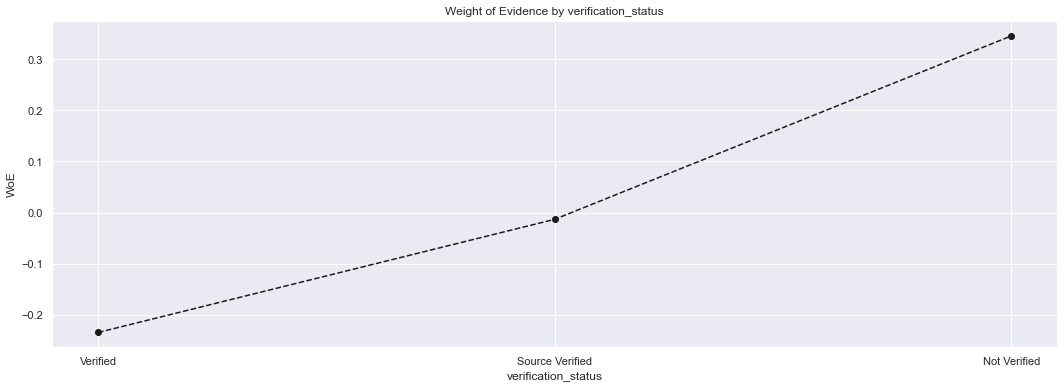

In [103]:
plot_by_woe(df_temp)

In [104]:
# processing the variable purpose
df_inputs_prepr['purpose'].unique()

array(['home_improvement', 'credit_card', 'debt_consolidation',
       'major_purchase', 'other', 'medical', 'small_business', 'house',
       'car', 'vacation', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [105]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,wedding,4,0.750000,0.000009,3.0,1.0,0.000007,0.000127,-2.864783,NaN,NaN,inf
1,renewable_energy,224,0.955357,0.000532,214.0,10.0,0.000518,0.001274,-0.900004,0.205357,1.964779,inf
2,small_business,3364,0.958680,0.007989,3225.0,139.0,0.007804,0.017705,-0.819181,0.003323,0.080823,inf
3,moving,2420,0.965289,0.005747,2336.0,84.0,0.005653,0.010699,-0.638016,0.006609,0.181164,inf
4,house,1438,0.967316,0.003415,1391.0,47.0,0.003366,0.005986,-0.575764,0.002026,0.062252,inf
5,medical,3938,0.970797,0.009352,3823.0,115.0,0.009251,0.014648,-0.459536,0.003482,0.116228,inf
6,major_purchase,7449,0.975970,0.017690,7270.0,179.0,0.017593,0.022800,-0.259269,0.005173,0.200267,inf
7,other,19204,0.976672,0.045605,18756.0,448.0,0.045387,0.057063,-0.228919,0.000702,0.030350,inf
8,vacation,2249,0.977768,0.005341,2199.0,50.0,0.005321,0.006369,-0.179660,0.001096,0.049259,inf
9,debt_consolidation,250020,0.979878,0.593739,244989.0,5031.0,0.592845,0.640810,-0.077800,0.002110,0.101860,inf


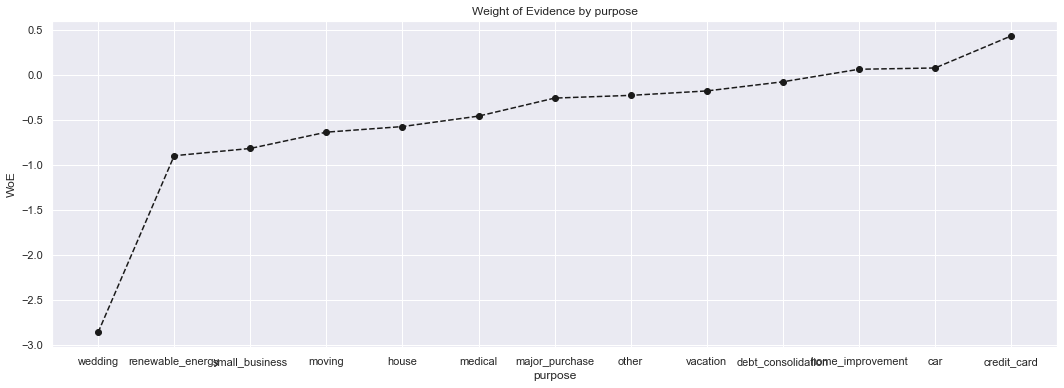

In [106]:
plot_by_woe(df_temp)

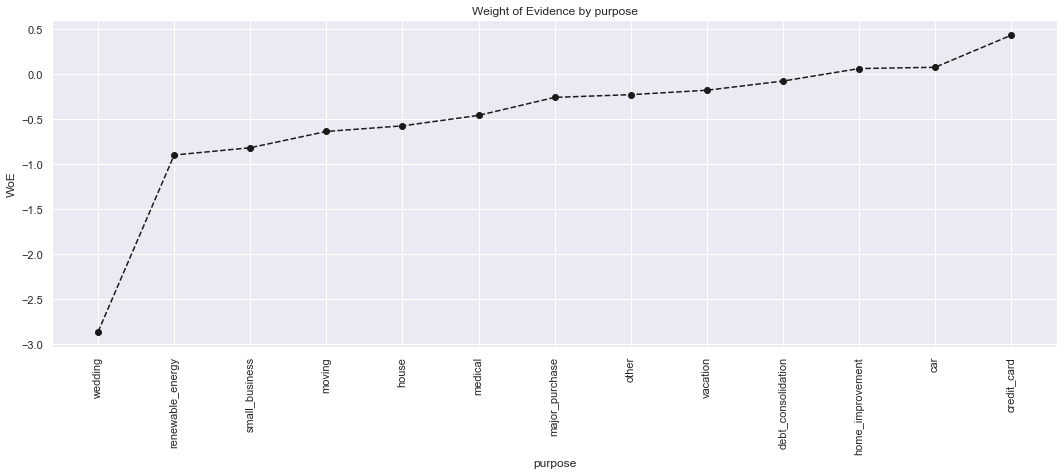

In [107]:
plot_by_woe(df_temp, 90)

In [108]:
#

df_inputs_prepr['purpose:sm_b__educ__mov__hou__ren_en__wedd'] = sum([df_inputs_prepr['purpose:small_business'], 
                                df_inputs_prepr['purpose:house'], df_inputs_prepr['purpose:educational'], 
                                df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:renewable_energy'], 
                                df_inputs_prepr['purpose:wedding']])

df_inputs_prepr['purpose:oth__med__vac'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'], df_inputs_prepr['purpose:vacation']])

df_inputs_prepr['purpose:maj_pur__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], 
                                df_inputs_prepr['purpose:car'],df_inputs_prepr['purpose:home_improvement']])

In [109]:
# processing the variable initial list status
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,153843,0.972550,0.365341,149620.0,4223.0,0.362063,0.537893,-0.395842,NaN,NaN,0.126296
1,w,267251,0.986425,0.634659,263623.0,3628.0,0.637937,0.462107,0.322444,0.013875,0.718286,0.126296


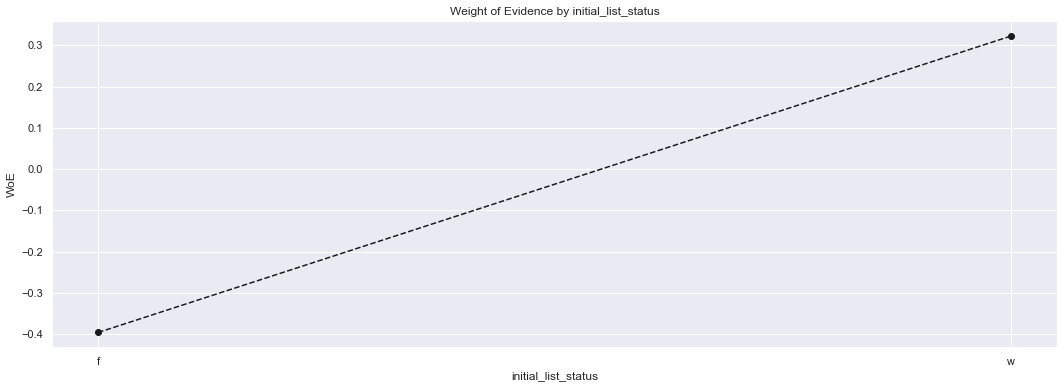

In [110]:
plot_by_woe(df_temp)

### Preprocessing continuous variables: Automating calculations and visualising results

In [111]:
def woe_ord_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], df_targets_prepr], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['num_good'] = df['prop_good'] * df['n_obs']
    df['num_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['num_good'] / df['num_good'].sum()
    df['prop_n_bad'] = df['num_bad'] / df['num_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = ((df['prop_n_good'] - df['prop_n_bad']) * df['WoE']).sum()
    return df

In [112]:
#processing the term variable
df_inputs_prepr['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [113]:
df_temp = woe_ord_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,283172,0.983533,0.672467,278509.0,4663.0,0.673959,0.593937,0.126396,NaN,NaN,0.027678
1,60,137922,0.976885,0.327533,134734.0,3188.0,0.326041,0.406063,-0.219486,0.006647,0.345883,0.027678


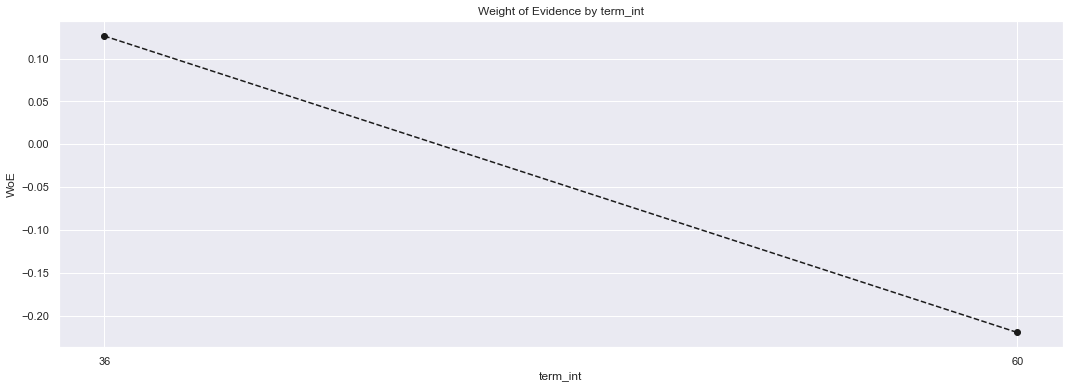

In [114]:
plot_by_woe(df_temp)

In [115]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [116]:
# preprocessing emplooyment length
df_inputs_prepr['emp_length_int'].unique()

array([10.,  0.,  5.,  3.,  4.,  2.,  8.,  9.,  1.,  6.,  7.])

In [117]:
df_temp = woe_ord_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,58157,0.977733,0.138109,56862.0,1295.0,0.137599,0.164947,-0.181278,NaN,NaN,0.019134
1,1.0,27473,0.977687,0.065242,26860.0,613.0,0.064998,0.078079,-0.183366,0.000046,0.002088,0.019134
2,2.0,37497,0.980932,0.089047,36782.0,715.0,0.089008,0.091071,-0.022914,0.003245,0.160453,0.019134
3,3.0,33430,0.980975,0.079388,32794.0,636.0,0.079358,0.081009,-0.020593,0.000043,0.002321,0.019134
4,4.0,24506,0.979678,0.058196,24008.0,498.0,0.058097,0.063431,-0.087853,0.001297,0.067260,0.019134
5,5.0,24930,0.980866,0.059203,24453.0,477.0,0.059173,0.060757,-0.026403,0.001188,0.061449,0.019134
6,6.0,16838,0.978976,0.039986,16484.0,354.0,0.039889,0.045090,-0.122546,0.001890,0.096143,0.019134
7,7.0,18414,0.979201,0.043729,18031.0,383.0,0.043633,0.048784,-0.111582,0.000224,0.010964,0.019134
8,8.0,21560,0.983905,0.051200,21213.0,347.0,0.051333,0.044198,0.149650,0.004705,0.261232,0.019134
9,9.0,16769,0.982289,0.039822,16472.0,297.0,0.039860,0.037830,0.052290,0.001617,0.097360,0.019134


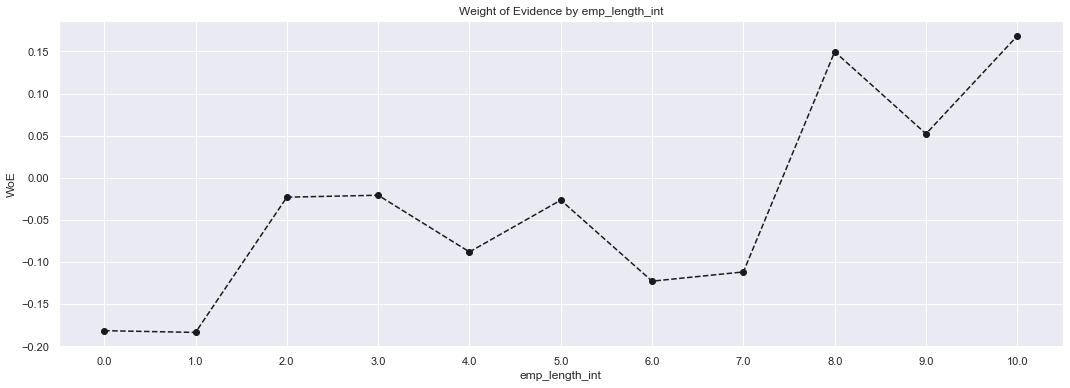

In [118]:
plot_by_woe(df_temp)

In [119]:
df_inputs_prepr['emp_length_int:0'] = np.where((df_inputs_prepr['emp_length_int'] == 0), 1, 0)
df_inputs_prepr['emp_length_int:1'] = np.where((df_inputs_prepr['emp_length_int'] == 1), 1, 0)
df_inputs_prepr['emp_length_int:2-4'] = np.where((df_inputs_prepr['emp_length_int'].isin(range(2, 5))), 1, 0)
df_inputs_prepr['emp_length_int:5-6'] = np.where((df_inputs_prepr['emp_length_int'].isin(range(5, 7))), 1, 0)
df_inputs_prepr['emp_length_int:7-9'] = np.where((df_inputs_prepr['emp_length_int'].isin(range(7, 10))), 1, 0)
df_inputs_prepr['emp_length_int:10'] = np.where((df_inputs_prepr['emp_length_int'] == 10), 1, 0)

In [120]:
df_inputs_prepr['months_since_issue_d'].unique()

array([-25.])

In [121]:
# fine classing
df_inputs_prepr['months_since_issue_d_factor'] = pd.cut(df_inputs_prepr['months_since_issue_d'], 40)

In [122]:
df_inputs_prepr['months_since_issue_d_factor']

0         (-25.001, -25.0]
1         (-25.001, -25.0]
2         (-25.001, -25.0]
3         (-25.001, -25.0]
4         (-25.001, -25.0]
                ...       
421089    (-25.001, -25.0]
421090    (-25.001, -25.0]
421091    (-25.001, -25.0]
421092    (-25.001, -25.0]
421093    (-25.001, -25.0]
Name: months_since_issue_d_factor, Length: 421094, dtype: category
Categories (40, interval[float64, right]): [(-25.025, -25.024] < (-25.024, -25.022] < (-25.022, -25.021] < (-25.021, -25.02] ... (-24.98, -24.979] < (-24.979, -24.978] < (-24.978, -24.976] < (-24.976, -24.975]]

In [123]:
df_temp = woe_ord_continuous(df_inputs_prepr, 'months_since_issue_d_factor', df_targets_prepr)
df_temp

,months_since_issue_d_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-25.025, -25.024]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,"(-25.024, -25.022]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,"(-25.022, -25.021]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,"(-25.021, -25.02]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,"(-25.02, -25.019]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,"(-25.019, -25.018]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,"(-25.018, -25.016]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,"(-25.016, -25.015]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,"(-25.015, -25.014]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,"(-25.014, -25.012]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


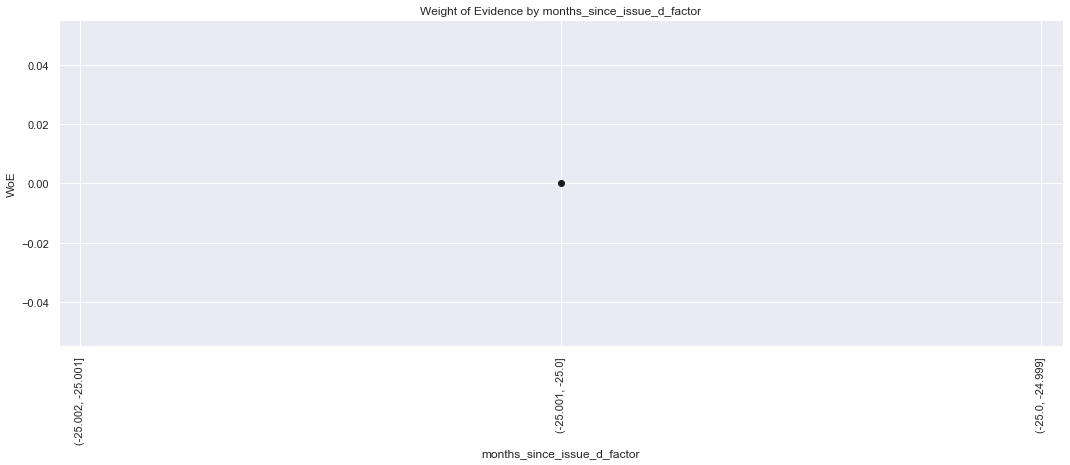

In [124]:
plot_by_woe(df_temp, 90)

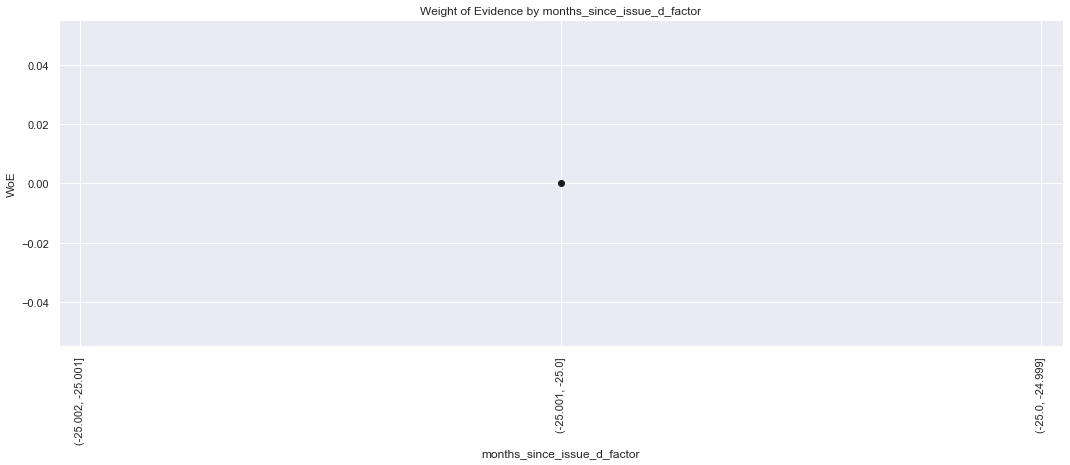

In [125]:
plot_by_woe(df_temp.iloc[:-1, :], 90)

In [126]:
df_inputs_prepr['months_since_issue_d:<3'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(0, 3)), 1, 0)

df_inputs_prepr['months_since_issue_d:3-8'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(3, 8)), 1, 0)

df_inputs_prepr['months_since_issue_d:8-13'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(8, 13)), 1, 0)

df_inputs_prepr['months_since_issue_d:13-18'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(13, 18)), 1, 0)

df_inputs_prepr['months_since_issue_d:18-25'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(18, 25)), 1, 0)

df_inputs_prepr['months_since_issue_d:25-31'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(25, 31)), 1, 0)

df_inputs_prepr['months_since_issue_d:31-36'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(31, 36)), 1, 0)

df_inputs_prepr['months_since_issue_d:36-64'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(36, 64)), 1, 0)

df_inputs_prepr['months_since_issue_d:>64'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(64, int(df_inputs_prepr['months_since_issue_d'].max()))), 1, 0)

In [127]:
df_inputs_prepr['int_rate'].unique()

array([11.99,  5.32, 14.85, 10.78,  9.8 ,  7.49, 13.99, 13.44, 22.45,
       17.27,  8.49, 19.89, 11.48,  6.49,  7.91, 15.77, 12.88,  9.17,
       23.13, 19.48, 16.59, 18.49, 20.5 , 17.97, 24.24,  6.99, 18.99,
       26.06, 21.48, 27.49, 26.99, 27.99, 28.49, 25.09, 28.99, 16.55,
       12.59, 13.67,  7.89, 10.64,  7.26, 17.86, 14.48, 13.18, 18.2 ,
        6.24,  8.38, 15.41,  6.89, 22.99,  9.76, 11.22, 20.99, 23.99,
       17.57, 27.88, 25.99, 21.99, 16.99, 19.99, 27.31, 24.99, 26.77,
       14.33,  6.  , 12.05,  8.18, 11.49, 10.99,  9.99, 11.53, 18.55,
       12.69, 13.33, 14.65, 18.25, 19.19, 12.29, 15.61, 25.78, 19.52,
       24.5 ,  6.39,  5.93, 21.67,  6.92,  6.68, 20.49, 25.8 , 18.84,
       25.57, 25.83, 25.89,  6.03,  8.19, 14.99,  8.67, 12.39, 16.49,
        9.49, 13.66, 10.49, 11.44, 15.59, 19.24, 17.14, 14.31, 12.99,
       18.54, 15.99])

In [128]:
# Preprocess interest rate variable
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
df_inputs_prepr['int_rate_factor']

0         (11.948, 12.421]
1           (5.296, 5.793]
2         (14.788, 15.261]
3         (11.948, 12.421]
4         (10.527, 11.001]
                ...       
421089    (11.948, 12.421]
421090    (11.948, 12.421]
421091    (15.735, 16.208]
421092    (19.522, 19.995]
421093    (11.948, 12.421]
Name: int_rate_factor, Length: 421094, dtype: category
Categories (50, interval[float64, right]): [(5.296, 5.793] < (5.793, 6.267] < (6.267, 6.74] < (6.74, 7.214] ... (27.096, 27.57] < (27.57, 28.043] < (28.043, 28.517] < (28.517, 28.99]]

In [129]:
df_temp = woe_ord_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.296, 5.793]",9651,0.999689,0.022919,9648.0,3.0,0.023347,0.000382,4.112499,NaN,NaN,inf
1,"(5.793, 6.267]",10214,0.997259,0.024256,10186.0,28.0,0.024649,0.003566,1.933170,0.002430,2.179329,inf
2,"(6.267, 6.74]",6530,0.994793,0.015507,6496.0,34.0,0.015720,0.004331,1.289186,0.002465,0.643984,inf
3,"(6.74, 7.214]",12488,0.995275,0.029656,12429.0,59.0,0.030077,0.007515,1.386855,0.000482,0.097669,inf
4,"(7.214, 7.687]",11416,0.997985,0.027110,11393.0,23.0,0.027570,0.002930,2.241865,0.002710,0.855010,inf
5,"(7.687, 8.16]",20636,0.995687,0.049006,20547.0,89.0,0.049721,0.011336,1.478439,0.002298,0.763426,inf
6,"(8.16, 8.634]",22498,0.994133,0.053428,22366.0,132.0,0.054123,0.016813,1.169100,0.001554,0.309339,inf
7,"(8.634, 9.107]",2020,0.979703,0.004797,1979.0,41.0,0.004789,0.005222,-0.086620,0.014430,1.255720,inf
8,"(9.107, 9.581]",22171,0.992783,0.052651,22011.0,160.0,0.053264,0.020380,0.960729,0.013080,1.047349,inf
9,"(9.581, 10.054]",22364,0.993829,0.053109,22226.0,138.0,0.053784,0.017577,1.118369,0.001046,0.157641,inf


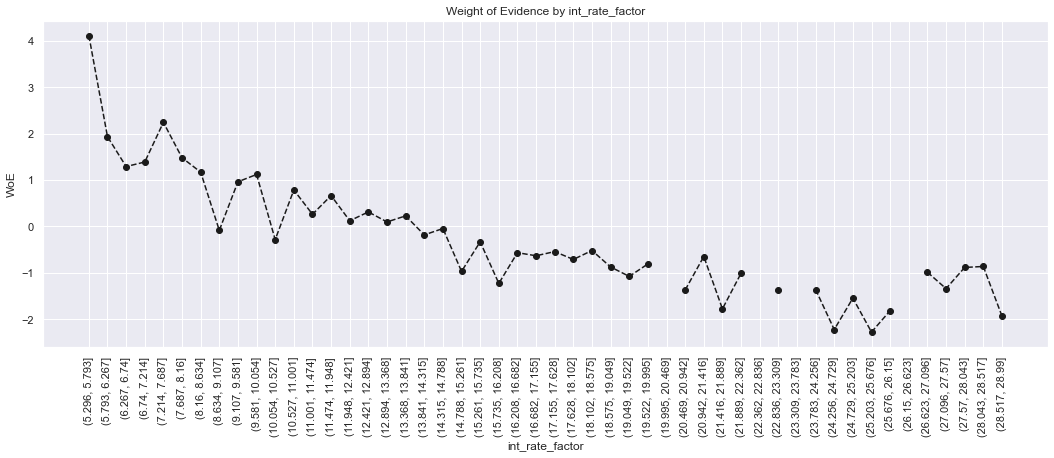

In [130]:
plot_by_woe(df_temp, 90)

In [131]:
# greater the interest rate, lower the WoE, higher the PD.
# the presence of a monotonic relationship makes it easier to determine the bounds of the intervals.
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] < 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where(((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025)), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where(((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74)), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where(((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281)), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [132]:
# processing the funded amount variable
df_inputs_prepr['funded_amnt'].unique()

array([35000,  8650,  4225, ..., 34525,  1625, 30275])

In [133]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_inputs_prepr['funded_amnt_factor']

0         (34320.0, 35000.0]
1           (8480.0, 9160.0]
2           (3720.0, 4400.0]
3          (9840.0, 10520.0]
4         (19360.0, 20040.0]
                 ...        
421089     (9840.0, 10520.0]
421090    (23440.0, 24120.0]
421091    (12560.0, 13240.0]
421092    (11880.0, 12560.0]
421093    (19360.0, 20040.0]
Name: funded_amnt_factor, Length: 421094, dtype: category
Categories (50, interval[float64, right]): [(966.0, 1680.0] < (1680.0, 2360.0] < (2360.0, 3040.0] < (3040.0, 3720.0] ... (32280.0, 32960.0] < (32960.0, 33640.0] < (33640.0, 34320.0] < (34320.0, 35000.0]]

In [134]:
df_temp = woe_ord_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(966.0, 1680.0]",3391,0.982306,0.008053,3331.0,60.0,0.008061,0.007642,0.053288,NaN,NaN,0.027107
1,"(1680.0, 2360.0]",3751,0.981338,0.008908,3681.0,70.0,0.008908,0.008916,-0.000950,0.000968,0.054239,0.027107
2,"(2360.0, 3040.0]",8134,0.981190,0.019316,7981.0,153.0,0.019313,0.019488,-0.009014,0.000148,0.008063,0.027107
3,"(3040.0, 3720.0]",5133,0.983246,0.012190,5047.0,86.0,0.012213,0.010954,0.108807,0.002056,0.117821,0.027107
4,"(3720.0, 4400.0]",7315,0.980041,0.017371,7169.0,146.0,0.017348,0.018596,-0.069480,0.003205,0.178287,0.027107
5,"(4400.0, 5080.0]",18150,0.982479,0.043102,17832.0,318.0,0.043151,0.040504,0.063304,0.002438,0.132784,0.027107
6,"(5080.0, 5760.0]",5617,0.984867,0.013339,5532.0,85.0,0.013387,0.010827,0.212259,0.002388,0.148955,0.027107
7,"(5760.0, 6440.0]",16224,0.982618,0.038528,15942.0,282.0,0.038578,0.035919,0.071410,0.002249,0.140848,0.027107
8,"(6440.0, 7120.0]",10565,0.982489,0.025089,10380.0,185.0,0.025118,0.023564,0.063885,0.000129,0.007525,0.027107
9,"(7120.0, 7800.0]",8423,0.980173,0.020003,8256.0,167.0,0.019979,0.021271,-0.062693,0.002316,0.126579,0.027107


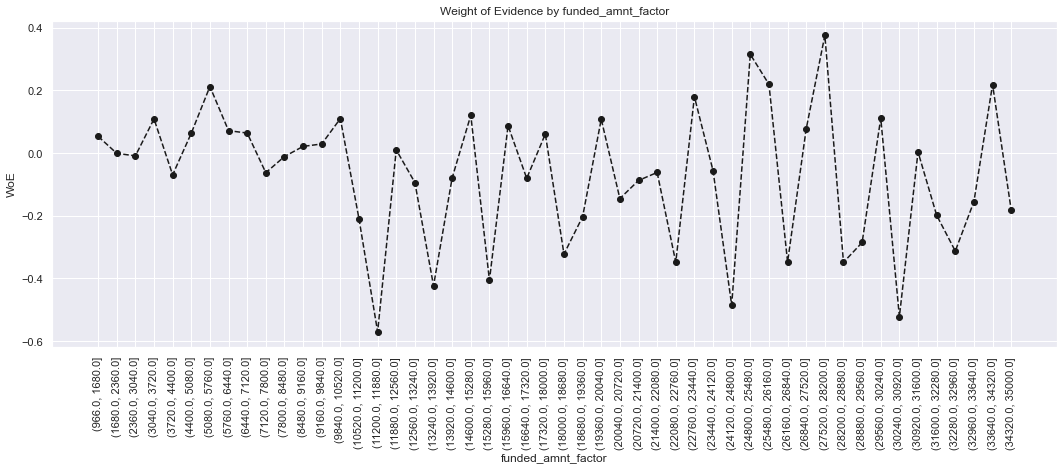

In [135]:
plot_by_woe(df_temp, 90)

In [136]:
# consecutive intervals of the variable have very different Weights of Evidence
# all of these variations seem to be around a single trend that is almost horizontal
# there seems to be no association between funded amount and WoE => sufficient reason to not include this 
# variable in PD model.

In [137]:
# mths_since_earliest_cr_line
df_inputs_prepr['months_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['months_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ord_continuous(df_inputs_prepr, 'months_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,months_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(60.474, 71.52]",2001,0.984508,0.004752,1970.0,31.0,0.004767,0.003949,0.188407,NaN,NaN,0.040048
1,"(71.52, 82.04]",4886,0.974417,0.011603,4761.0,125.0,0.011521,0.015922,-0.323496,0.010091,0.511902,0.040048
2,"(82.04, 92.56]",4610,0.972017,0.010948,4481.0,129.0,0.010843,0.016431,-0.415606,0.002399,0.092110,0.040048
3,"(92.56, 103.08]",5446,0.975762,0.012933,5314.0,132.0,0.012859,0.016813,-0.268097,0.003745,0.147509,0.040048
4,"(103.08, 113.6]",6146,0.968272,0.014595,5951.0,195.0,0.014401,0.024838,-0.545080,0.007490,0.276983,0.040048
5,"(113.6, 124.12]",10200,0.978137,0.024223,9977.0,223.0,0.024143,0.028404,-0.162529,0.009865,0.382551,0.040048
6,"(124.12, 134.64]",11155,0.974361,0.026491,10869.0,286.0,0.026302,0.036428,-0.325717,0.003776,0.163188,0.040048
7,"(134.64, 145.16]",15641,0.977111,0.037144,15283.0,358.0,0.036983,0.045599,-0.209431,0.002750,0.116285,0.040048
8,"(145.16, 155.68]",18480,0.979275,0.043886,18097.0,383.0,0.043793,0.048784,-0.107928,0.002163,0.101503,0.040048
9,"(155.68, 166.2]",24374,0.977066,0.057883,23815.0,559.0,0.057630,0.071201,-0.211473,0.002209,0.103545,0.040048


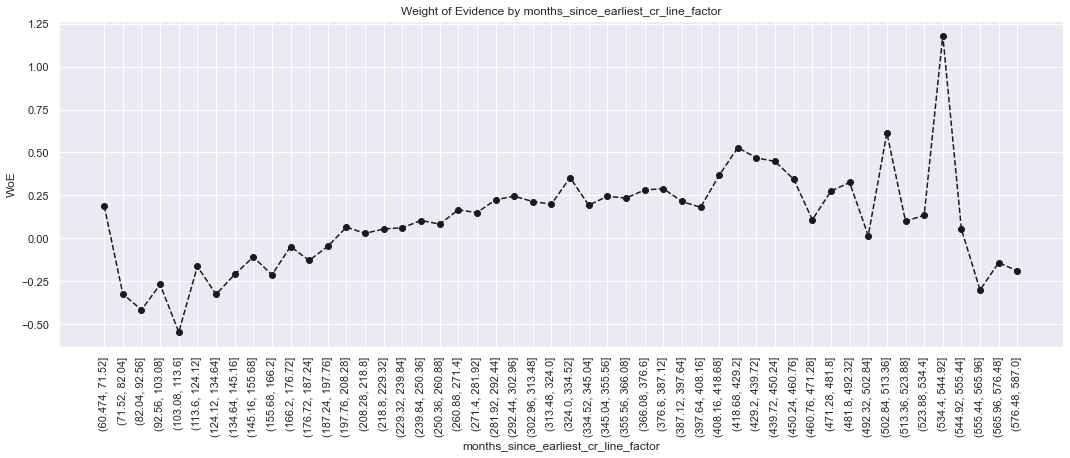

In [138]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

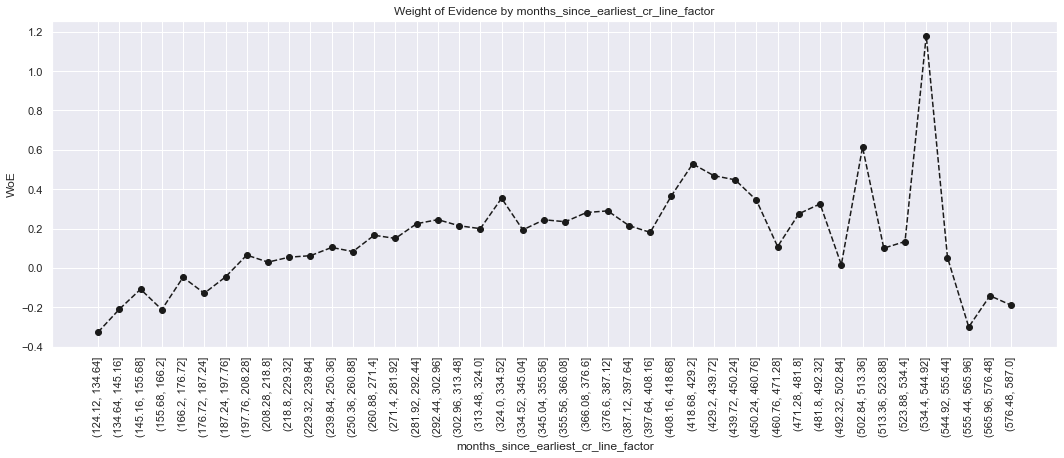

In [139]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

In [140]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['months_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['months_since_earliest_cr_line'].max()))), 1, 0)

In [141]:
# delinq_2yrs
df_temp = woe_ord_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,334007,0.981812,0.793189,327932.0,6075.0,0.793557,0.773787,0.025229,NaN,NaN,inf
1,1.0,57000,0.980246,0.135362,55874.0,1126.0,0.135209,0.143421,-0.058967,0.001566,0.084197,inf
2,2.0,17241,0.979120,0.040943,16881.0,360.0,0.040850,0.045854,-0.115555,0.001126,0.056588,inf
3,3.0,6293,0.976800,0.014944,6147.0,146.0,0.014875,0.018596,-0.223282,0.002320,0.107727,inf
4,4.0,2949,0.976263,0.007003,2879.0,70.0,0.006967,0.008916,-0.246692,0.000536,0.023410,inf
5,5.0,1475,0.978305,0.003503,1443.0,32.0,0.003492,0.004076,-0.154651,0.002042,0.092041,inf
6,6.0,842,0.980998,0.002000,826.0,16.0,0.001999,0.002038,-0.019389,0.002693,0.135262,inf
7,7.0,438,0.984018,0.001040,431.0,7.0,0.001043,0.000892,0.156803,0.003021,0.176192,inf
8,8.0,284,0.982394,0.000674,279.0,5.0,0.000675,0.000637,0.058379,0.001624,0.098424,inf
9,9.0,173,0.976879,0.000411,169.0,4.0,0.000409,0.000509,-0.219791,0.005516,0.278170,inf


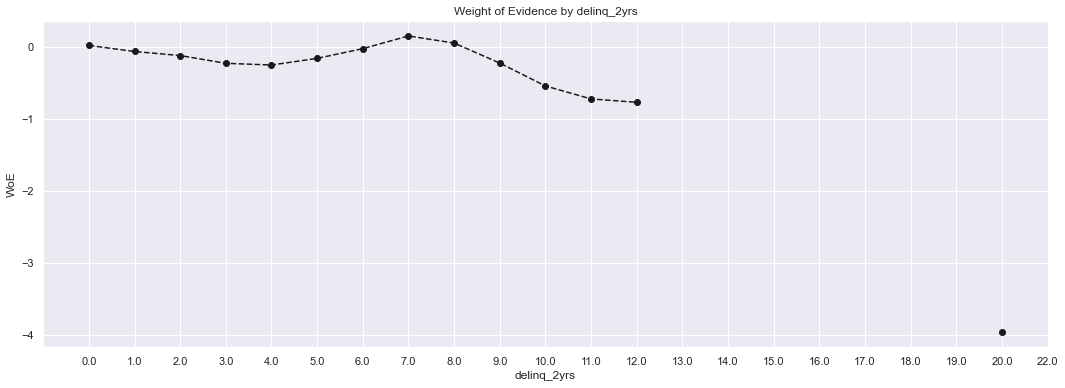

In [142]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [143]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [144]:
# inq_last_6mths
df_temp = woe_ord_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,inq_last_6mths,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,256407,0.984813,0.608907,252513.0,3894.0,0.611052,0.495988,0.208631,NaN,NaN,0.06837
1,1.0,111346,0.978571,0.264421,108960.0,2386.0,0.263671,0.303910,-0.142032,0.006242,0.350663,0.06837
2,2.0,36292,0.973438,0.086185,35328.0,964.0,0.085490,0.122787,-0.362055,0.005134,0.220023,0.06837
3,3.0,12272,0.964635,0.029143,11838.0,434.0,0.028647,0.055280,-0.657369,0.008803,0.295314,0.06837
4,4.0,3517,0.966164,0.008352,3398.0,119.0,0.008223,0.015157,-0.611576,0.001529,0.045793,0.06837
5,5.0,1217,0.957272,0.002890,1165.0,52.0,0.002819,0.006623,-0.854162,0.008892,0.242586,0.06837
6,6.0,43,0.953488,0.000102,41.0,2.0,0.000099,0.000255,-0.942970,0.003784,0.088808,0.06837


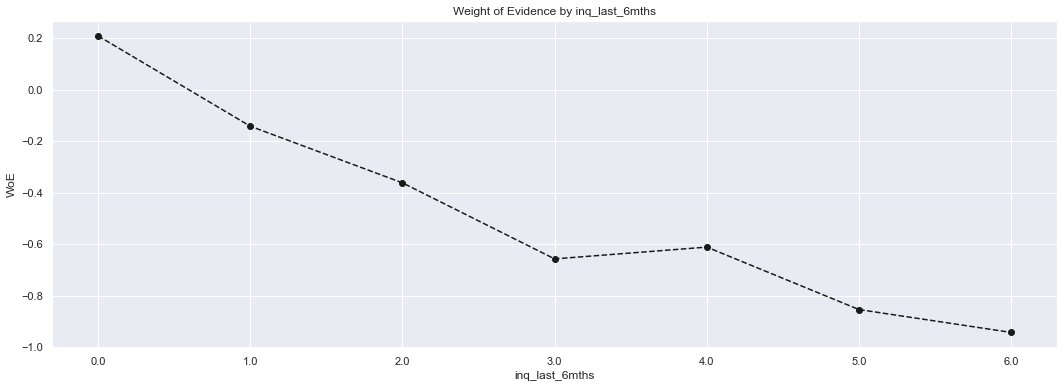

In [145]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [146]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [147]:
# open_acc
df_temp = woe_ord_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,open_acc,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1.0,90,0.988889,0.000214,89.0,1.0,0.000215,0.000127,0.525241,NaN,NaN,inf
1,2.0,986,0.972617,0.002342,959.0,27.0,0.002321,0.003439,-0.393341,0.016272,0.918582,inf
2,3.0,4119,0.984462,0.009782,4055.0,64.0,0.009813,0.008152,0.185428,0.011846,0.578769,inf
3,4.0,10779,0.978941,0.025598,10552.0,227.0,0.025535,0.028914,-0.124274,0.005522,0.309702,inf
4,5.0,18222,0.980738,0.043273,17871.0,351.0,0.043246,0.044708,-0.033247,0.001797,0.091028,inf
5,6.0,25117,0.980491,0.059647,24627.0,490.0,0.059594,0.062412,-0.046202,0.000246,0.012955,inf
6,7.0,30294,0.981283,0.071941,29727.0,567.0,0.071936,0.072220,-0.003943,0.000792,0.042258,inf
7,8.0,34685,0.980885,0.082369,34022.0,663.0,0.082329,0.084448,-0.025407,0.000398,0.021464,inf
8,9.0,36266,0.981801,0.086123,35606.0,660.0,0.086162,0.084066,0.024635,0.000916,0.050042,inf
9,10.0,35809,0.980647,0.085038,35116.0,693.0,0.084977,0.088269,-0.038013,0.001154,0.062647,inf


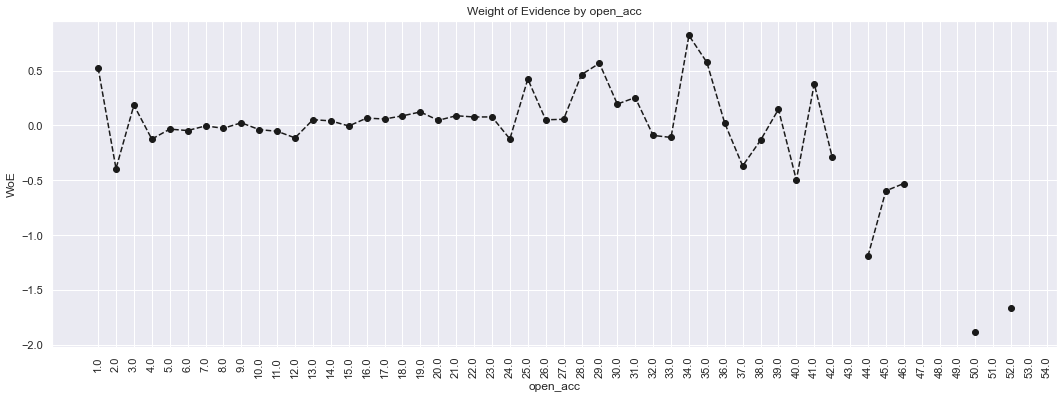

In [148]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

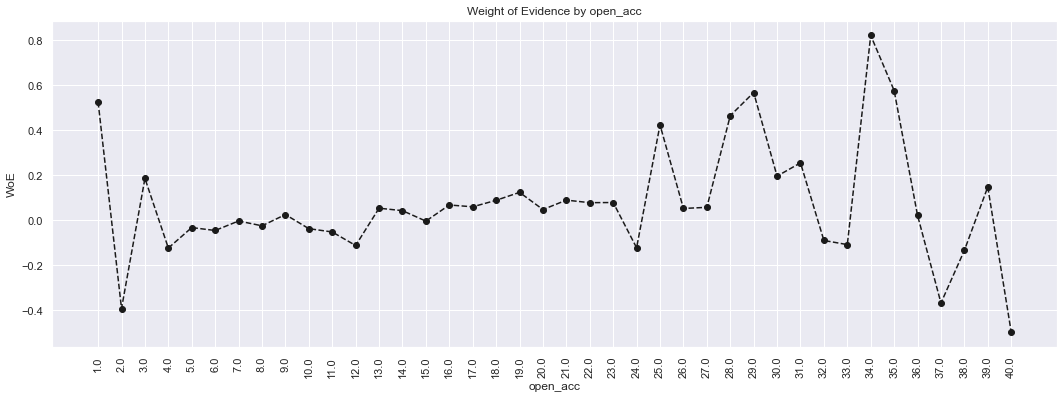

In [149]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [150]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [151]:
# pub_rec
df_temp = woe_ord_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,346679,0.981594,0.823282,340298.0,6381.0,0.823482,0.812763,0.013102,NaN,NaN,inf
1,1.0,60215,0.979972,0.142997,59009.0,1206.0,0.142795,0.153611,-0.073014,0.001622,0.086116,inf
2,2.0,9230,0.982124,0.021919,9065.0,165.0,0.021936,0.021016,0.042836,0.002152,0.115850,inf
3,3.0,2876,0.979833,0.006830,2818.0,58.0,0.006819,0.007388,-0.080055,0.002290,0.122891,inf
4,4.0,1044,0.977011,0.002479,1020.0,24.0,0.002468,0.003057,-0.213891,0.002822,0.133836,inf
5,5.0,481,0.979210,0.001142,471.0,10.0,0.001140,0.001274,-0.111122,0.002198,0.102769,inf
6,6.0,249,0.983936,0.000591,245.0,4.0,0.000593,0.000509,0.151569,0.004726,0.262691,inf
7,7.0,108,1.000000,0.000256,108.0,0.0,0.000261,0.000000,inf,0.016064,inf,inf
8,8.0,84,1.000000,0.000199,84.0,0.0,0.000203,0.000000,inf,0.000000,NaN,inf
9,9.0,34,0.970588,0.000081,33.0,1.0,0.000080,0.000127,-0.466887,0.029412,inf,inf


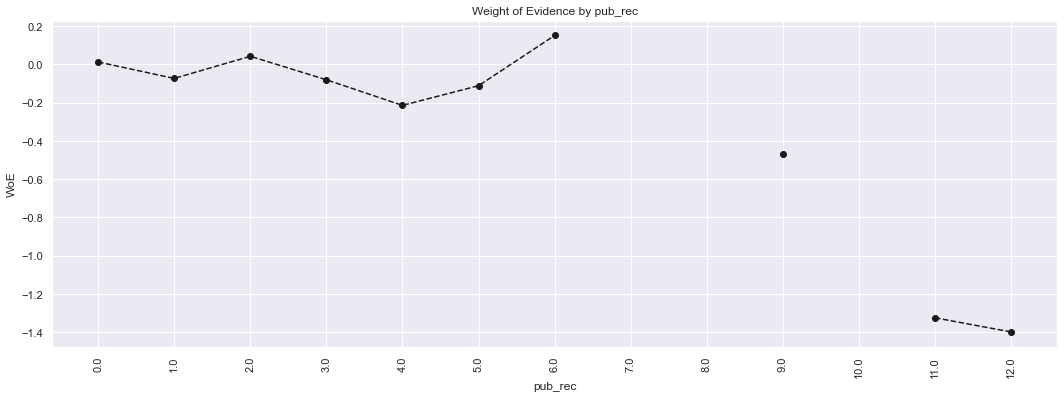

In [152]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [153]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [154]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ord_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3.835, 7.3]",11333,0.976970,0.026913,11072.0,261.0,0.026793,0.033244,-0.215741,NaN,NaN,inf
1,"(7.3, 10.6]",21005,0.979767,0.049882,20580.0,425.0,0.049801,0.054133,-0.083409,0.002797,0.132332,inf
2,"(10.6, 13.9]",31446,0.979457,0.074677,30800.0,646.0,0.074532,0.082283,-0.098924,0.000310,0.015515,inf
3,"(13.9, 17.2]",53180,0.980557,0.126290,52146.0,1034.0,0.126187,0.131703,-0.042782,0.001100,0.056142,inf
4,"(17.2, 20.5]",44528,0.981742,0.105744,43715.0,813.0,0.105785,0.103554,0.021321,0.001185,0.064103,inf
5,"(20.5, 23.8]",44749,0.981676,0.106268,43929.0,820.0,0.106303,0.104445,0.017631,0.000066,0.003690,inf
6,"(23.8, 27.1]",55586,0.981182,0.132004,54540.0,1046.0,0.131980,0.133231,-0.009434,0.000493,0.027065,inf
7,"(27.1, 30.4]",35493,0.982363,0.084288,34867.0,626.0,0.084374,0.079735,0.056551,0.001180,0.065985,inf
8,"(30.4, 33.7]",29540,0.982668,0.070151,29028.0,512.0,0.070244,0.065215,0.074297,0.000305,0.017746,inf
9,"(33.7, 37.0]",30463,0.982405,0.072343,29927.0,536.0,0.072420,0.068272,0.058987,0.000263,0.015309,inf


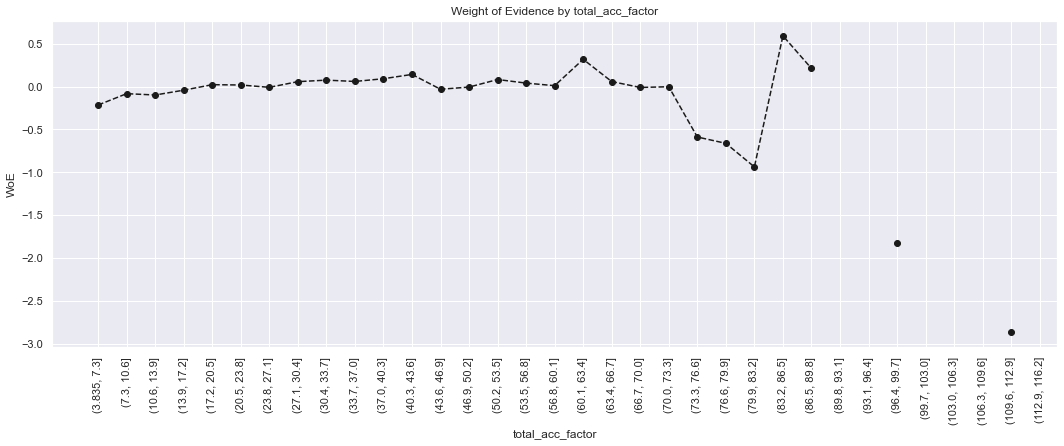

In [155]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [156]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [157]:
# acc_now_delinq
df_temp = woe_ord_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,418712,0.981424,0.994343,410934.0,7778.0,0.994412,0.990702,0.003738,NaN,NaN,inf
1,1.0,2243,0.971021,0.005327,2178.0,65.0,0.005271,0.008279,-0.451620,0.010403,0.455358,inf
2,2.0,116,0.939655,0.000275,109.0,7.0,0.000264,0.000892,-1.217957,0.031366,0.766337,inf
3,3.0,17,1.000000,0.000040,17.0,0.0,0.000041,0.000000,inf,0.060345,inf,inf
4,4.0,3,0.666667,0.000007,2.0,1.0,0.000005,0.000127,-3.270248,0.333333,inf,inf
5,5.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.333333,inf,inf
6,6.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
7,14.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf


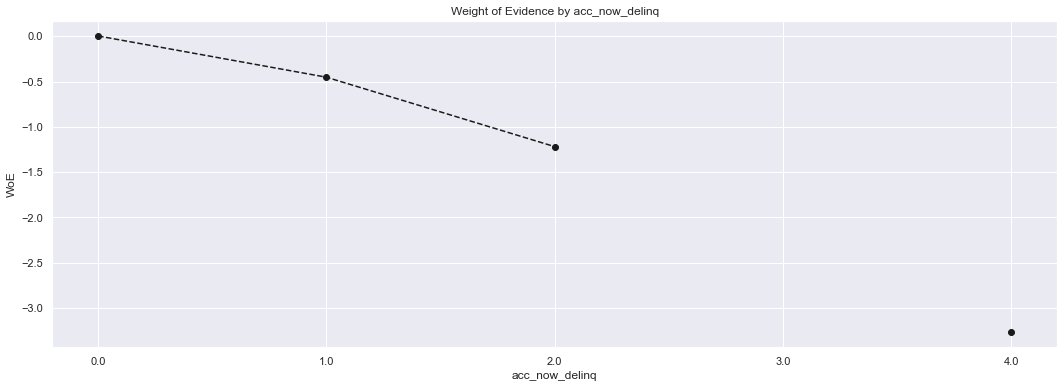

In [158]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [159]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [160]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ord_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",12981,0.971266,0.030827,12608.0,373.0,0.030510,0.047510,-0.442886,NaN,NaN,inf
1,"(5000.0, 9999.999]",42858,0.974801,0.101778,41778.0,1080.0,0.101098,0.137562,-0.307986,0.003535,0.134900,inf
2,"(9999.999, 14999.998]",56173,0.977658,0.133398,54918.0,1255.0,0.132895,0.159852,-0.184689,0.002858,0.123297,inf
3,"(14999.998, 19999.998]",54873,0.979498,0.130311,53748.0,1125.0,0.130064,0.143294,-0.096871,0.001840,0.087818,inf
4,"(19999.998, 24999.997]",46739,0.981942,0.110994,45895.0,844.0,0.111061,0.107502,0.032564,0.002444,0.129436,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


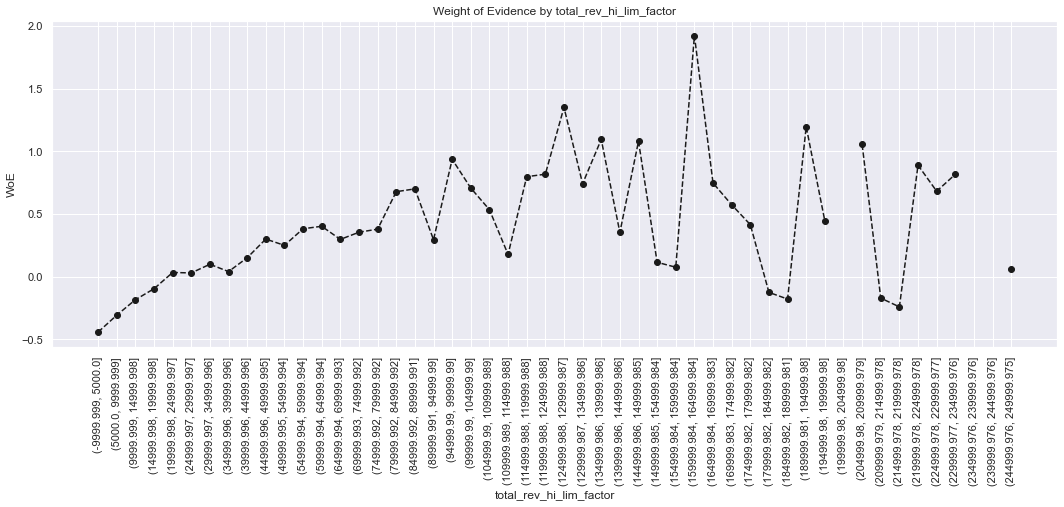

In [161]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [162]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [163]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ord_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(28.705, 58.427]",3506,0.982886,0.008326,3446.0,60.0,0.008339,0.007642,0.087230,NaN,NaN,inf
1,"(58.427, 86.734]",5832,0.981310,0.013850,5723.0,109.0,0.013849,0.013884,-0.002494,0.001576,0.089724,inf
2,"(86.734, 115.04]",8123,0.983134,0.019290,7986.0,137.0,0.019325,0.017450,0.102069,0.001824,0.104564,inf
3,"(115.04, 143.347]",9139,0.982383,0.021703,8978.0,161.0,0.021726,0.020507,0.057733,0.000751,0.044336,inf
4,"(143.347, 171.654]",17953,0.984459,0.042634,17674.0,279.0,0.042769,0.035537,0.185243,0.002076,0.127510,inf
5,"(171.654, 199.961]",15515,0.985691,0.036845,15293.0,222.0,0.037007,0.028277,0.269078,0.001232,0.083835,inf
6,"(199.961, 228.268]",16515,0.982864,0.039219,16232.0,283.0,0.039280,0.036046,0.085898,0.002827,0.183180,inf
7,"(228.268, 256.574]",22043,0.983033,0.052347,21669.0,374.0,0.052436,0.047637,0.095987,0.000169,0.010089,inf
8,"(256.574, 284.881]",25323,0.980966,0.060136,24841.0,482.0,0.060112,0.061393,-0.021088,0.002067,0.117075,inf
9,"(284.881, 313.188]",24135,0.980443,0.057315,23663.0,472.0,0.057262,0.060120,-0.048706,0.000523,0.027618,inf


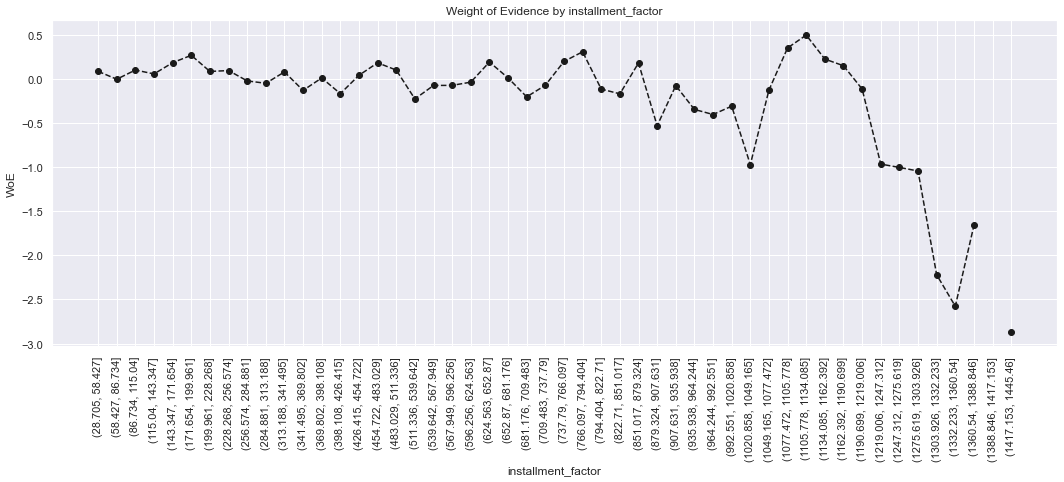

In [164]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Creatin dummy variables

In [165]:
# preprocessing annual income
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_ord_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9500.0, 190000.0]",409693,0.981193,0.972925,401988.0,7705.0,0.972764,0.981404,-0.008842,NaN,NaN,inf
1,"(190000.0, 380000.0]",10007,0.986609,0.023764,9873.0,134.0,0.023892,0.017068,0.336324,0.005416,0.345166,inf
2,"(380000.0, 570000.0]",943,0.990456,0.002239,934.0,9.0,0.002260,0.001146,0.678857,0.003847,0.342533,inf
3,"(570000.0, 760000.0]",257,1.000000,0.000610,257.0,0.0,0.000622,0.000000,inf,0.009544,inf,inf
4,"(760000.0, 950000.0]",70,1.000000,0.000166,70.0,0.0,0.000169,0.000000,inf,0.000000,NaN,inf
5,"(950000.0, 1140000.0]",43,1.000000,0.000102,43.0,0.0,0.000104,0.000000,inf,0.000000,NaN,inf
6,"(1140000.0, 1330000.0]",20,0.950000,0.000047,19.0,1.0,0.000046,0.000127,-1.018956,0.050000,inf,inf
7,"(1330000.0, 1520000.0]",14,1.000000,0.000033,14.0,0.0,0.000034,0.000000,inf,0.050000,inf,inf
8,"(1520000.0, 1710000.0]",3,0.666667,0.000007,2.0,1.0,0.000005,0.000127,-3.270248,0.333333,inf,inf
9,"(1710000.0, 1900000.0]",5,1.000000,0.000012,5.0,0.0,0.000012,0.000000,inf,0.333333,inf,inf


In [166]:
# first category contains 94% of obs
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp = woe_ord_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9500.0, 95000.0]",325648,0.980203,0.773338,319201.0,6447.0,0.772429,0.821169,-0.061189,NaN,NaN,inf
1,"(95000.0, 190000.0]",84045,0.985032,0.199587,82787.0,1258.0,0.200335,0.160234,0.223353,0.004829,0.284542,inf
2,"(190000.0, 285000.0]",8186,0.986196,0.019440,8073.0,113.0,0.019536,0.014393,0.305498,0.001164,0.082145,inf
3,"(285000.0, 380000.0]",1821,0.988468,0.004324,1800.0,21.0,0.004356,0.002675,0.487625,0.002272,0.182127,inf
4,"(380000.0, 475000.0]",652,0.990798,0.001548,646.0,6.0,0.001563,0.000764,0.715645,0.002330,0.228021,inf
5,"(475000.0, 570000.0]",291,0.989691,0.000691,288.0,3.0,0.000697,0.000382,0.600953,0.001107,0.114692,inf
6,"(570000.0, 665000.0]",165,1.000000,0.000392,165.0,0.0,0.000399,0.000000,inf,0.010309,inf,inf
7,"(665000.0, 760000.0]",92,1.000000,0.000218,92.0,0.0,0.000223,0.000000,inf,0.000000,NaN,inf
8,"(760000.0, 855000.0]",46,1.000000,0.000109,46.0,0.0,0.000111,0.000000,inf,0.000000,NaN,inf
9,"(855000.0, 950000.0]",24,1.000000,0.000057,24.0,0.0,0.000058,0.000000,inf,0.000000,NaN,inf


In [167]:
# first category is again too large because there are very few people with high income and more people with lower
#  income
# good idea to put aside people with large income

df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, :]

In [168]:
df_inputs_prepr_temp

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,months_since_earliest_cr_line,issue_d_date,months_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ID,addr_state:IA,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:sm_b__educ__mov__hou__ren_en__wedd,purpose:oth__med__vac,purpose:maj_pur__car__home_impr,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,months_since_issue_d_factor,months_since_issue_d:<3,months_since_issue_d:3-8,months_since_issue_d:8-13,months_since_issue_d:13-18,months_since_issue_d:18-25,months_since_issue_d:25-31,months_since_issue_d:31-36,months_since_issue_d:36-64,months_since_issue_d:>64,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,funded_amnt_factor,months_since_earliest_cr_line_factor,months_since_earliest_cr_line:<140,months_since_earliest_cr_line:141-164

In [169]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_inputs_prepr_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,months_since_earliest_cr_line,issue_d_date,months_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ID,addr_state:IA,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:sm_b__educ__mov__hou__ren_en__wedd,purpose:oth__med__vac,purpose:maj_pur__car__home_impr,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,months_since_issue_d_factor,months_since_issue_d:<3,months_since_issue_d:3-8,months_since_issue_d:8-13,months_since_issue_d:13-18,months_since_issue_d:18-25,months_since_issue_d:25-31,months_since_issue_d:31-36,months_since_issue_d:36-64,months_since_issue_d:>64,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,funded_amnt_factor,months_since_earliest_cr_line_factor,months_since_earliest_cr_line:<140,months_since_earliest_cr_line:141-164

In [170]:
df_temp = woe_ord_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-140.0, 2800.0]",4,1.000000,0.000010,4.0,0.0,0.000010,0.000000,inf,NaN,NaN,inf
1,"(2800.0, 5600.0]",12,0.916667,0.000031,11.0,1.0,0.000029,0.000135,-1.547375,0.083333,inf,inf
2,"(5600.0, 8400.0]",55,0.981818,0.000141,54.0,1.0,0.000141,0.000135,0.043714,0.065152,1.591089,inf
3,"(8400.0, 11200.0]",429,0.965035,0.001097,414.0,15.0,0.001079,0.002022,-0.627454,0.016783,0.671168,inf
4,"(11200.0, 14000.0]",873,0.977090,0.002233,853.0,20.0,0.002224,0.002695,-0.192243,0.012056,0.435212,inf
5,"(14000.0, 16800.0]",1339,0.973114,0.003425,1303.0,36.0,0.003397,0.004852,-0.356364,0.003976,0.164122,inf
6,"(16800.0, 19600.0]",1808,0.966814,0.004624,1748.0,60.0,0.004558,0.008086,-0.573387,0.006300,0.217023,inf
7,"(19600.0, 22400.0]",3823,0.972273,0.009778,3717.0,106.0,0.009691,0.014286,-0.388037,0.005459,0.185350,inf
8,"(22400.0, 25200.0]",6445,0.973933,0.016485,6277.0,168.0,0.016366,0.022642,-0.324587,0.001660,0.063450,inf
9,"(25200.0, 28000.0]",5904,0.977134,0.015101,5769.0,135.0,0.015041,0.018194,-0.190291,0.003201,0.134296,inf


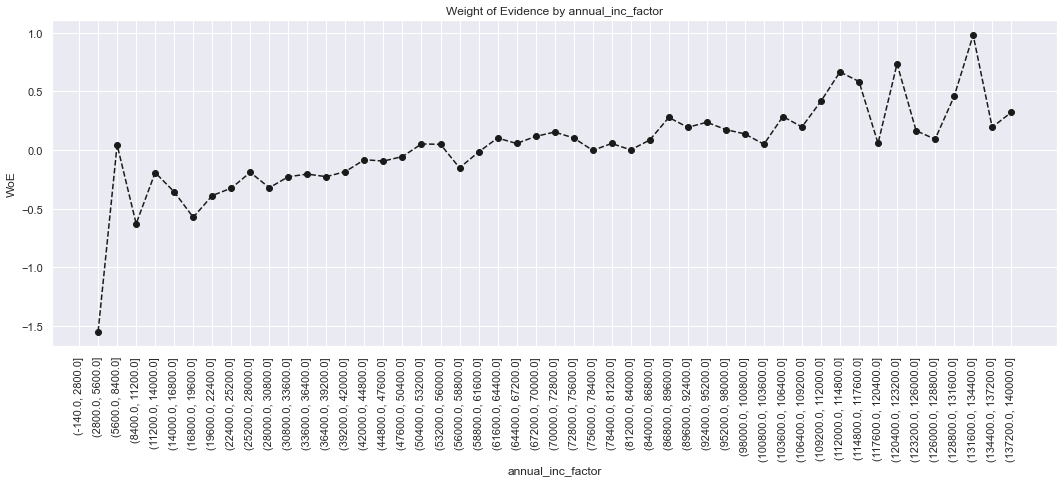

In [171]:
plot_by_woe(df_temp, 90)

In [172]:
# WoE is monotonically increasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [173]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [174]:
df_temp = woe_ord_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.176, 3.52]",7261,0.973833,0.033440,7071.0,190.0,0.033183,0.047041,-0.349003,NaN,NaN,inf
1,"(3.52, 7.04]",15763,0.978367,0.072596,15422.0,341.0,0.072372,0.084427,-0.154068,0.004534,0.194935,inf
2,"(7.04, 10.56]",12365,0.980348,0.056947,12122.0,243.0,0.056886,0.060163,-0.056020,0.001981,0.098048,inf
3,"(10.56, 14.08]",16125,0.979721,0.074263,15798.0,327.0,0.074136,0.080961,-0.088058,0.000627,0.032037,inf
4,"(14.08, 17.6]",11384,0.976985,0.052429,11122.0,262.0,0.052193,0.064868,-0.217400,0.002736,0.129343,inf
5,"(17.6, 21.12]",14291,0.983626,0.065817,14057.0,234.0,0.065966,0.057935,0.129818,0.006641,0.347219,inf
6,"(21.12, 24.64]",10544,0.982170,0.048560,10356.0,188.0,0.048598,0.046546,0.043143,0.001456,0.086675,inf
7,"(24.64, 28.16]",13761,0.981760,0.063376,13510.0,251.0,0.063399,0.062144,0.019996,0.000410,0.023147,inf
8,"(28.16, 31.68]",9867,0.985001,0.045442,9719.0,148.0,0.045609,0.036643,0.218889,0.003240,0.198893,inf
9,"(31.68, 35.2]",12583,0.985218,0.057951,12397.0,186.0,0.058176,0.046051,0.233727,0.000218,0.014837,inf


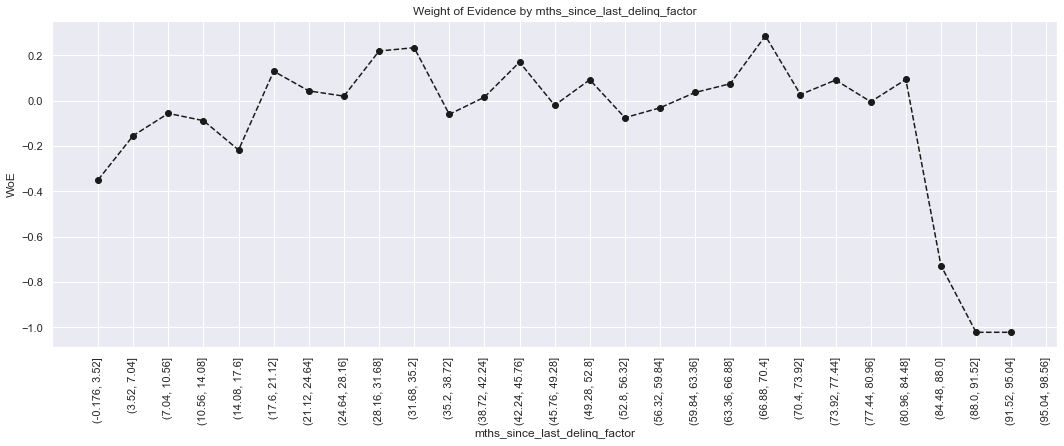

In [175]:
plot_by_woe(df_temp, 90)

In [176]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [177]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ord_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9.999, 99.99]",421083,0.981355,0.999974,413232.0,7851.0,0.999973,1.0,-0.000027,NaN,NaN,inf
1,"(99.99, 199.98]",6,1.000000,0.000014,6.0,0.0,0.000015,0.0,inf,0.018645,inf,inf
2,"(199.98, 299.97]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(299.97, 399.96]",1,1.000000,0.000002,1.0,0.0,0.000002,0.0,inf,NaN,NaN,inf
4,"(399.96, 499.95]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(499.95, 599.94]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(599.94, 699.93]",1,1.000000,0.000002,1.0,0.0,0.000002,0.0,inf,NaN,NaN,inf
7,"(699.93, 799.92]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(799.92, 899.91]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(899.91, 999.9]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


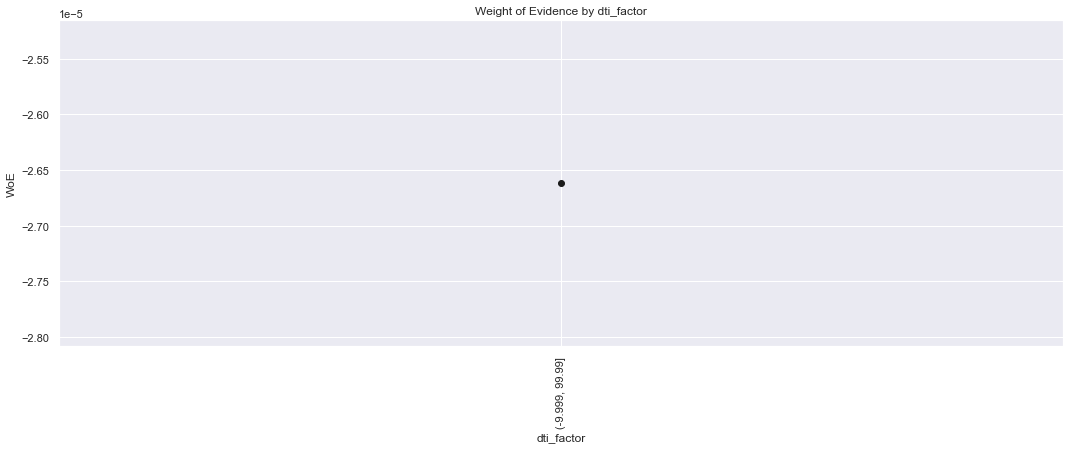

In [178]:
plot_by_woe(df_temp, 90)

In [179]:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [180]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ord_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.12, 2.4]",87,0.965517,0.001169,84.0,3.0,0.001152,0.002041,-0.572239,NaN,NaN,0.060687
1,"(2.4, 4.8]",161,0.968944,0.002164,156.0,5.0,0.002139,0.003401,-0.464025,0.003427,0.108214,0.060687
2,"(4.8, 7.2]",344,0.976744,0.004623,336.0,8.0,0.004606,0.005442,-0.166774,0.007800,0.297252,0.060687
3,"(7.2, 9.6]",291,0.982818,0.003911,286.0,5.0,0.003921,0.003401,0.142111,0.006074,0.308884,0.060687
4,"(9.6, 12.0]",537,0.970205,0.007216,521.0,16.0,0.007142,0.010884,-0.421282,0.012613,0.563393,0.060687
5,"(12.0, 14.4]",404,0.985149,0.005429,398.0,6.0,0.005456,0.004082,0.290249,0.014944,0.711531,0.060687
6,"(14.4, 16.8]",410,0.980488,0.005510,402.0,8.0,0.005511,0.005442,0.012567,0.004661,0.277682,0.060687
7,"(16.8, 19.2]",693,0.987013,0.009313,684.0,9.0,0.009377,0.006122,0.426290,0.006525,0.413723,0.060687
8,"(19.2, 21.6]",521,0.986564,0.007001,514.0,7.0,0.007046,0.004762,0.391870,0.000449,0.034420,0.060687
9,"(21.6, 24.0]",825,0.979394,0.011086,808.0,17.0,0.011077,0.011565,-0.043095,0.007170,0.434964,0.060687


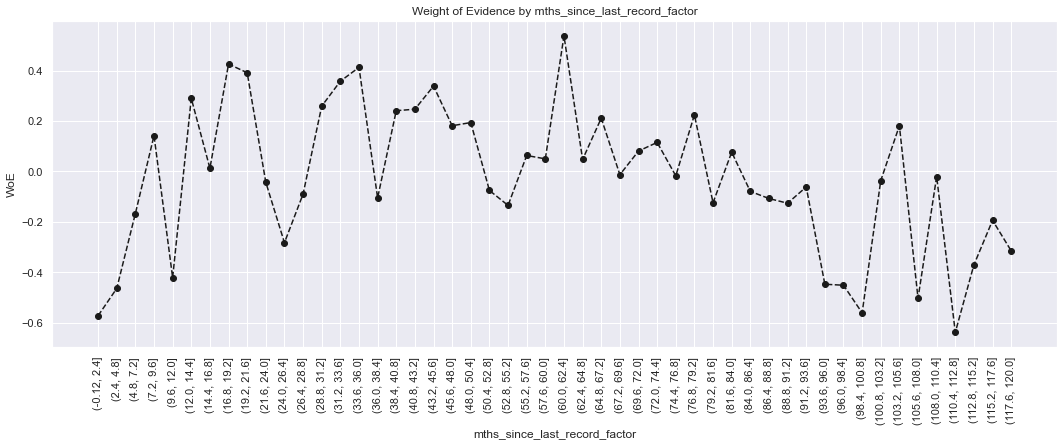

In [181]:
plot_by_woe(df_temp, 90)

In [182]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

### Preprocessing the test dataset

In [183]:
#loan_data_inputs_train = df_inputs_prepr
#loan_data_inputs_test = df_inputs_prepr
loan_data_inputs_2015 = df_inputs_prepr

In [184]:
loan_data_targets_2015 = df_targets_prepr

In [185]:
loan_data_inputs_2015.shape

(421094, 321)

In [186]:
loan_data_targets_2015.shape

(421094,)

In [187]:
loan_data_inputs_2015.to_csv('loan_data_inputs_2015.csv')
loan_data_targets_2015.to_csv('loan_data_targets_2015.csv')

In [297]:
#loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
#loan_data_targets_train.to_csv('loan_data_targets_train.csv')
#loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
#loan_data_targets_test.to_csv('loan_data_targets_test.csv')

>>> The code up to here, from the other line starting with '>>>' is copied from the Data Preparation notebook, with minor adjustments

In [188]:
inputs_train_with_ref_cat = pd.read_csv('inputs_train_with_ref_cat.csv', index_col = 0)

In [233]:
inputs_2015_with_ref_cat = loan_data_inputs_2015.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:sm_b__educ__mov__hou__ren_en__wedd',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vac',
'purpose:maj_pur__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'months_since_issue_d:<3',
'months_since_issue_d:3-8',
'months_since_issue_d:8-13',
'months_since_issue_d:13-18',
'months_since_issue_d:18-25',
'months_since_issue_d:25-31',
'months_since_issue_d:31-36',
'months_since_issue_d:36-64',
'months_since_issue_d:>64',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:141-164',
'months_since_earliest_cr_line:165-247',
'months_since_earliest_cr_line:248-270',
'months_since_earliest_cr_line:271-352',
'months_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]

In [234]:
inputs_train_with_ref_cat.shape

(93257, 109)

In [235]:
inputs_2015_with_ref_cat.shape

(421094, 108)

In [236]:
set(inputs_train_with_ref_cat.columns.values).symmetric_difference(set(inputs_2015_with_ref_cat.columns.values))

{'Intercept', 'int_rate:20.281', 'int_rate:>20.281'}

In [237]:
inputs_2015_with_ref_cat.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:RENT_OTHER_NONE_ANY',
       'home_ownership:OWN', 'home_ownership:MORTGAGE',
       'addr_state:ND_NE_IA_NV_FL_HI_AL', 'addr_state:NM_VA',
       'addr_state:NY', 'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:CA',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:TX', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified',
       'purpose:sm_b__educ__mov__hou__ren_en__wedd',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:oth__med__vac', 'purpose:maj_pur__car__home_impr',
       'initial_list_status:f', 'initial_list_status:w', 'term:36',
       'term:60', 'emp_length_int:0', 'emp_lengt

In [238]:
inputs_train_with_ref_cat.columns.values

array(['Intercept', 'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E',
       'grade:F', 'grade:G', 'home_ownership:RENT_OTHER_NONE_ANY',
       'home_ownership:OWN', 'home_ownership:MORTGAGE',
       'addr_state:ND_NE_IA_NV_FL_HI_AL', 'addr_state:NM_VA',
       'addr_state:NY', 'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:CA',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:TX', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified',
       'purpose:sm_b__educ__mov__hou__ren_en__wedd',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:oth__med__vac', 'purpose:maj_pur__car__home_impr',
       'initial_list_status:f', 'initial_list_status:w', 'term:36',
       'term:60', 'emp_length_int:0

In [239]:
inputs_train_with_ref_cat_copy = inputs_train_with_ref_cat.drop(['Intercept'], axis = 1)

In [240]:
inputs_train_with_ref_cat_copy.shape

(93257, 108)

In [241]:
inputs_train_with_ref_cat

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:sm_b__educ__mov__hou__ren_en__wedd,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vac,purpose:maj_pur__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,months_since_issue_d:<3,months_since_issue_d:3-8,months_since_issue_d:8-13,months_since_issue_d:13-18,months_since_issue_d:18-25,months_since_issue_d:25-31,months_since_issue_d:31-36,months_since_issue_d:36-64,months_since_issue_d:>64,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:20.281,months_since_earliest_cr_line:<140,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [242]:
inputs_2015_with_ref_cat

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:sm_b__educ__mov__hou__ren_en__wedd,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vac,purpose:maj_pur__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,months_since_issue_d:<3,months_since_issue_d:3-8,months_since_issue_d:8-13,months_since_issue_d:13-18,months_since_issue_d:18-25,months_since_issue_d:25-31,months_since_issue_d:31-36,months_since_issue_d:36-64,months_since_issue_d:>64,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,months_since_earliest_cr_line:<140,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421089,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [243]:
df_scorecard = pd.read_csv('df_scorecard.csv', index_col = 0)

In [244]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score Calculation,Score Preliminary
0,0,Intercept,-0.666899,NaN,Intercept,377.425683,377.0
1,1,grade:A,0.498180,1.552825e-08,grade,39.948310,40.0
2,2,grade:B,0.454111,2.735461e-14,grade,36.414539,36.0
3,3,grade:C,0.361663,6.998933e-11,grade,29.001282,29.0
4,4,grade:D,0.312780,3.312991e-09,grade,25.081378,25.0
...,...,...,...,...,...,...,...
104,12,total_rev_hi_lim:<=5K,0.000000,NaN,total_rev_hi_lim,0.000000,0.0
105,13,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0
106,14,dti:>35,0.000000,NaN,dti,0.000000,0.0
107,15,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0


In [245]:
intercept_itwrf = inputs_train_with_ref_cat[df_scorecard['Feature name'].values]

In [246]:
intercept_itwrf.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vac,purpose:maj_pur__car__home_impr,initial_list_status:w,term:36,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,months_since_issue_d:<3,months_since_issue_d:3-8,months_since_issue_d:8-13,months_since_issue_d:13-18,months_since_issue_d:18-25,months_since_issue_d:25-31,months_since_issue_d:31-36,months_since_issue_d:36-64,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:sm_b__educ__mov__hou__ren_en__wedd,initial_list_status:f,term:60,emp_length_int:0,months_since_issue_d:>64,int_rate:20.281,months_since_earliest_cr_line:<140,inq_last_6mths:>6,total_rev_hi_lim:<=5K,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [247]:
inputs_2015_with_ref_cat.rename(columns={'int_rate:>20.281' : 'int_rate:20.281'}, inplace = True)
intercept_2015_iwrf = inputs_2015_with_ref_cat
intercept_2015_iwrf.insert(0, 'Intercept', 1)
intercept_2015_iwrf = intercept_2015_iwrf[df_scorecard['Feature name'].values]
intercept_2015_iwrf.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vac,purpose:maj_pur__car__home_impr,initial_list_status:w,term:36,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,months_since_issue_d:<3,months_since_issue_d:3-8,months_since_issue_d:8-13,months_since_issue_d:13-18,months_since_issue_d:18-25,months_since_issue_d:25-31,months_since_issue_d:31-36,months_since_issue_d:36-64,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:sm_b__educ__mov__hou__ren_en__wedd,initial_list_status:f,term:60,emp_length_int:0,months_since_issue_d:>64,int_rate:20.281,months_since_earliest_cr_line:<140,inq_last_6mths:>6,total_rev_hi_lim:<=5K,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [248]:
set(inputs_train_with_ref_cat.columns.values).symmetric_difference(set(inputs_2015_with_ref_cat.columns.values))

set()

In [249]:
scorecard_scores = df_scorecard['Score Preliminary']
scorecard_scores.shape

(109,)

In [250]:
scorecard_scores = scorecard_scores.values.reshape(109, 1)

In [251]:
y_scores_train = intercept_itwrf.dot(scorecard_scores)
y_scores_train.head()

,0
362514,609.0
288564,548.0
213591,600.0
263083,624.0
165001,736.0


In [252]:
y_scores_2015 = intercept_2015_iwrf.dot(scorecard_scores)
y_scores_2015.head()

,0
0,746.0
1,739.0
2,624.0
3,614.0
4,683.0


In [253]:
intercept_itwrf = pd.concat([intercept_itwrf, y_scores_train], axis = 1)
intercept_2015_iwrf = pd.concat([intercept_2015_iwrf, y_scores_2015], axis = 1)

In [260]:
intercept_itwrf.columns.values[intercept_itwrf.shape[1] - 1] = 'Score'
intercept_2015_iwrf.columns.values[intercept_2015_iwrf.shape[1] - 1] = 'Score'

In [261]:
intercept_2015_iwrf.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vac,purpose:maj_pur__car__home_impr,initial_list_status:w,term:36,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,months_since_issue_d:<3,months_since_issue_d:3-8,months_since_issue_d:8-13,months_since_issue_d:13-18,months_since_issue_d:18-25,months_since_issue_d:25-31,months_since_issue_d:31-36,months_since_issue_d:36-64,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:sm_b__educ__mov__hou__ren_en__wedd,initial_list_status:f,term:60,emp_length_int:0,months_since_issue_d:>64,int_rate:20.281,months_since_earliest_cr_line:<140,inq_last_6mths:>6,total_rev_hi_lim:<=5K,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2,Score
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,746.0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,739.0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,624.0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,614.0
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,683.0


In [264]:
intercept_itwrf.iloc[:, -1]

362514    609.0
288564    548.0
213591    600.0
263083    624.0
165001    736.0
          ...  
115       586.0
296284    677.0
61777     733.0
91763     688.0
167512    699.0
Name: Score, Length: 93257, dtype: float64

In [266]:
intercept_itwrf['Score:300-350'] = np.where((intercept_itwrf['Score'] >= 300) & (intercept_itwrf['Score'] < 350), 1, 0)
intercept_itwrf['Score:350-400'] = np.where((intercept_itwrf['Score'] >= 350) & (intercept_itwrf['Score'] < 400), 1, 0)
intercept_itwrf['Score:400-450'] = np.where((intercept_itwrf['Score'] >= 400) & (intercept_itwrf['Score'] < 450), 1, 0)
intercept_itwrf['Score:450-500'] = np.where((intercept_itwrf['Score'] >= 450) & (intercept_itwrf['Score'] < 500), 1, 0)
intercept_itwrf['Score:500-550'] = np.where((intercept_itwrf['Score'] >= 500) & (intercept_itwrf['Score'] < 550), 1, 0)
intercept_itwrf['Score:550-600'] = np.where((intercept_itwrf['Score'] >= 550) & (intercept_itwrf['Score'] < 600), 1, 0)
intercept_itwrf['Score:600-650'] = np.where((intercept_itwrf['Score'] >= 600) & (intercept_itwrf['Score'] < 650), 1, 0)
intercept_itwrf['Score:650-700'] = np.where((intercept_itwrf['Score'] >= 650) & (intercept_itwrf['Score'] < 700), 1, 0)
intercept_itwrf['Score:700-750'] = np.where((intercept_itwrf['Score'] >= 700) & (intercept_itwrf['Score'] < 750), 1, 0)
intercept_itwrf['Score:750-800'] = np.where((intercept_itwrf['Score'] >= 750) & (intercept_itwrf['Score'] < 800), 1, 0)
intercept_itwrf['Score:800-850'] = np.where((intercept_itwrf['Score'] >= 800) & (intercept_itwrf['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with old ("expected").

In [271]:
intercept_2015_iwrf['Score:300-350'] = np.where((intercept_2015_iwrf['Score'] >= 300) & (intercept_2015_iwrf['Score'] < 350), 1, 0)
intercept_2015_iwrf['Score:350-400'] = np.where((intercept_2015_iwrf['Score'] >= 350) & (intercept_2015_iwrf['Score'] < 400), 1, 0)
intercept_2015_iwrf['Score:400-450'] = np.where((intercept_2015_iwrf['Score'] >= 400) & (intercept_2015_iwrf['Score'] < 450), 1, 0)
intercept_2015_iwrf['Score:450-500'] = np.where((intercept_2015_iwrf['Score'] >= 450) & (intercept_2015_iwrf['Score'] < 500), 1, 0)
intercept_2015_iwrf['Score:500-550'] = np.where((intercept_2015_iwrf['Score'] >= 500) & (intercept_2015_iwrf['Score'] < 550), 1, 0)
intercept_2015_iwrf['Score:550-600'] = np.where((intercept_2015_iwrf['Score'] >= 550) & (intercept_2015_iwrf['Score'] < 600), 1, 0)
intercept_2015_iwrf['Score:600-650'] = np.where((intercept_2015_iwrf['Score'] >= 600) & (intercept_2015_iwrf['Score'] < 650), 1, 0)
intercept_2015_iwrf['Score:650-700'] = np.where((intercept_2015_iwrf['Score'] >= 650) & (intercept_2015_iwrf['Score'] < 700), 1, 0)
intercept_2015_iwrf['Score:700-750'] = np.where((intercept_2015_iwrf['Score'] >= 700) & (intercept_2015_iwrf['Score'] < 750), 1, 0)
intercept_2015_iwrf['Score:750-800'] = np.where((intercept_2015_iwrf['Score'] >= 750) & (intercept_2015_iwrf['Score'] < 800), 1, 0)
intercept_2015_iwrf['Score:800-850'] = np.where((intercept_2015_iwrf['Score'] >= 800) & (intercept_2015_iwrf['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with old ("expected").

In [286]:
intercept_2015_iwrf

KeyboardInterrupt: 

### Population Stability Index: Calucation and Interpretation
we need the proportions of observations per category for all of its dummy variables categories.

In [272]:
PSI_calc_train = intercept_itwrf.sum() / intercept_itwrf.shape[0]

In [273]:
PSI_calc_2015 = intercept_2015_iwrf.sum() / intercept_2015_iwrf.shape[0]

In [274]:
# concat connects by dummy variable name
PSI_calc = pd.concat([PSI_calc_train, PSI_calc_2015], axis = 1)

In [275]:
PSI_calc = PSI_calc.reset_index()
PSI_calc['Original feature name'] = PSI_calc['index'].str.split(':').str[0]
PSI_calc.columns = ['index', 'Proportions_train', 'Proportions_new', 'Original feature name']

In [276]:
PSI_calc = PSI_calc[np.array(['index', 'Original feature name', 'Proportions_train', 'Proportions_new'])]

In [280]:
PSI_calc

,index,Original feature name,Proportions_train,Proportions_new
0,Intercept,Intercept,1.000000,1.000000
1,grade:A,grade,0.162004,0.174154
2,grade:B,grade,0.291656,0.279287
3,grade:C,grade,0.268591,0.286318
4,grade:D,grade,0.165028,0.148789
5,grade:E,grade,0.076616,0.082993
6,grade:F,grade,0.028942,0.023313
7,home_ownership:OWN,home_ownership,0.090170,0.108684
8,home_ownership:MORTGAGE,home_ownership,0.503115,0.493196
9,addr_state:NM_VA,addr_state,0.036126,0.034159


In [279]:
pd.options.display.max_rows = None

In [281]:
PSI_calc = PSI_calc[(PSI_calc['index'] != 'Intercept') & (PSI_calc['index'] != 'Score')]

In [282]:
PSI_calc

,index,Original feature name,Proportions_train,Proportions_new
1,grade:A,grade,0.162004,0.174154
2,grade:B,grade,0.291656,0.279287
3,grade:C,grade,0.268591,0.286318
4,grade:D,grade,0.165028,0.148789
5,grade:E,grade,0.076616,0.082993
6,grade:F,grade,0.028942,0.023313
7,home_ownership:OWN,home_ownership,0.090170,0.108684
8,home_ownership:MORTGAGE,home_ownership,0.503115,0.493196
9,addr_state:NM_VA,addr_state,0.036126,0.034159
10,addr_state:NY,addr_state,0.086117,0.080372


In [283]:
PSI_calc['Contribution'] = np.where(((PSI_calc['Proportions_train'] == 0) | (PSI_calc['Proportions_new'] == 0)), 0,
                                    ((PSI_calc['Proportions_new'] - PSI_calc['Proportions_train']) * np.log(PSI_calc['Proportions_new'] / PSI_calc['Proportions_train'])))

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [284]:
PSI_calc

,index,Original feature name,Proportions_train,Proportions_new,Contribution
1,grade:A,grade,0.162004,0.174154,8.786172e-04
2,grade:B,grade,0.291656,0.279287,5.360620e-04
3,grade:C,grade,0.268591,0.286318,1.133041e-03
4,grade:D,grade,0.165028,0.148789,1.682176e-03
5,grade:E,grade,0.076616,0.082993,5.098596e-04
6,grade:F,grade,0.028942,0.023313,1.217222e-03
7,home_ownership:OWN,home_ownership,0.090170,0.108684,3.457228e-03
8,home_ownership:MORTGAGE,home_ownership,0.503115,0.493196,1.974984e-04
9,addr_state:NM_VA,addr_state,0.036126,0.034159,1.101635e-04
10,addr_state:NY,addr_state,0.086117,0.080372,3.966771e-04


In [285]:
PSI_calc.groupby('Original feature name')['Contribution'].sum()

Original feature name
Score                            0.205809
addr_state                       0.003639
annual_inc                       0.005255
dti                              0.079642
emp_length_int                   0.007649
grade                            0.006624
home_ownership                   0.003838
initial_list_status              0.330154
inq_last_6mths                   0.046737
int_rate                         0.079123
months_since_earliest_cr_line    0.035160
months_since_issue_d             0.000000
mths_since_last_delinq           0.011918
mths_since_last_record           0.055192
purpose                          0.012502
term                             0.012713
total_rev_hi_lim                 0.065920
verification_status              0.048688
Name: Contribution, dtype: float64

The new population differs from the original population by 1 out of 17 original independent variables. For the variable, the differences may not be due to a change in the characteristic of the borrowers themselves. The PSI of Score is 0.205 (< 0.25) thus the populations do not differ significantly w.r.t. the estimated credit scores. Hence, we can conclude that our model outputs are not significantly different than those before.